In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
df=pd.read_csv('Semi_cleaned_data.csv')
d2=pd.read_csv('Semi_cleaned_data.csv')

In [17]:
d2['Diagnosis']=['No' if i!='-'  else  'Yes' for i in df['Diagnosis'] ]

# Label encoding 

In [18]:
encoder=LabelEncoder()
df['Diagnosis']=encoder.fit_transform(df['Diagnosis'])

In [19]:
df.isna().sum()

age                             1
sex                           417
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                          1126
T3_measured                     0
T3                           3189
TT4_measured                    0
TT4                           626
T4U_measured                    0
T4U                          1106
FTI_measured                    0
FTI                          1097
referral_source                 0
Diagnosis                       0
dtype: int64

# Handling outliers

In [4]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,other,0
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,other,0
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,0
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,0
4,32.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,35


Since only only column can be illegical to get outlier, that is 'age' column, values can't be >100 , but can be <3 or 1 but can't be <1

Replacing outliers with nan values so that it will be handled

In [ ]:
df[df['age']>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
2976,455.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.10,t,2.0,t,118.0,t,1.13,t,104.0,SVI,-
5710,65511.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.38,t,2.0,t,113.0,t,1.08,t,104.0,other,-
6392,65512.0,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.03,t,2.8,t,112.0,t,0.84,t,133.0,other,-
8105,65526.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.50,f,NaN,t,132.0,t,1.02,t,129.0,other,-
10536,455.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.10,t,2.0,t,118.0,t,1.13,t,104.0,SVI,-


In [4]:
df['age']=df['age'].replace({455.0:np.nan,65511.0:np.nan,65512.0:np.nan,65526.0:np.nan})

In [59]:
max(df['TSH'])

530.0

In [60]:
min(df['TSH'])

0.005

In [178]:
df[df['age']>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis


In [179]:
df[df['TSH']>400]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
425,24.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,430.0,t,0.4,t,6.0,t,1.04,t,6.0,other,F
3075,59.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,530.0,t,2.0,t,10.0,t,1.12,t,8.5,other,F
3346,18.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,440.0,t,0.5,t,24.0,t,1.32,t,18.0,other,F
4496,2.0,NaN,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,472.0,t,1.7,t,34.0,t,1.17,t,29.0,STMW,F
4854,25.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,468.0,t,0.7,t,21.0,t,1.10,t,19.0,other,F
5181,18.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,478.0,f,NaN,t,45.0,t,1.30,t,34.0,other,F
6932,54.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,436.0,f,NaN,t,12.0,t,1.01,t,12.0,other,F
7219,81.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,494.0,t,0.5,t,12.0,t,1.39,t,9.0,SVI,F
8181,26.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,460.0,t,0.5,t,22.0,t,1.38,t,16.0,SVI,F
8866,19.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,500.0,t,0.5,t,5.0,t,1.19,t,4.0,other,F


In [ ]:
very rare, it is possible to get a TSH value greater than 500 mIU/L.  Here's why:

Normal Range is a Guideline: The standard TSH range (0.4 mIU/L to 4.5 mIU/L) is a widely accepted guideline for healthy thyroid function in most adults. However, some individuals may naturally fall outside this range without experiencing thyroid issues.
Very Rare Causes: Extremely high TSH levels (above 500 mIU/L) are more likely to indicate a very rare medical condition, such as:
Pituitary gland tumor: This can cause the pituitary to overproduce TSH, leading to a very high level.
Severe hypothyroidism (underactive thyroid): In some advanced cases, the body may attempt to compensate for low thyroid hormone production by significantly increasing TSH levels.
Measurement Error: Though less likely, a lab error during the blood test could also lead to an inaccurate TSH result.

In [136]:
df[df['T3']==18]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
7224,23.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,0.065,t,18.0,t,430.0,t,0.67,t,642.0,other,A


# Removing unnecessary features

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Diagnosis
0,29.0,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,other,-
2,41.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
3,36.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-
4,32.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,S


In [ ]:
df.columns[16:26:2]

Index(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured'],
      dtype='object')

In [5]:
df.drop(df.columns[16:26:2],axis=1,inplace=True)

In [114]:
df.shape

(11972, 23)

## Splitting train,test

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Diagnosis'],axis=1),df[['Diagnosis']],random_state=80,test_size=0.25)

In [7]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8979, 22), (2993, 22), (8979, 1), (2993, 1))

In [8]:
numeric_cols=df.select_dtypes(exclude='object').columns

In [9]:
ohe=OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8979 entries, 2152 to 1199
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        8978 non-null   float64
 1   sex                        8668 non-null   object 
 2   on_thyroxine               8979 non-null   object 
 3   query_on_thyroxine         8979 non-null   object 
 4   on_antithyroid_medication  8979 non-null   object 
 5   sick                       8979 non-null   object 
 6   pregnant                   8979 non-null   object 
 7   thyroid_surgery            8979 non-null   object 
 8   I131_treatment             8979 non-null   object 
 9   query_hypothyroid          8979 non-null   object 
 10  query_hyperthyroid         8979 non-null   object 
 11  lithium                    8979 non-null   object 
 12  goitre                     8979 non-null   object 
 13  tumor                      8979 non-null   object 

In [11]:
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [12]:
X_test.shape

(2993, 22)

In [71]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Diagnosis'],
      dtype='object')

# Encoding

In [10]:
# Check and ensure all categories are present in the training set

# List of columns to encode
columns_to_encode = [
    'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
    'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
    'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
    'referral_source'
]

# Combine both sets to find unique categories
combined_data = pd.concat([X_train[columns_to_encode], X_test[columns_to_encode]])

# Find the unique categories in each column
for column in columns_to_encode:
    unique_train = set(X_train[column].unique())
    unique_test = set(X_test[column].unique())
    missing_in_train = unique_test - unique_train

    # If there are missing categories in the training set, handle them
    if missing_in_train:
        print(f"Column '{column}' has categories in test set not present in train set: {missing_in_train}")
        # Add missing categories to the training set
        for category in missing_in_train:
            X_train = pd.concat([X_train, pd.DataFrame({column: [category]})], ignore_index=True)

# After ensuring the training set is complete, fit the encoder
ohe.fit(X_train[columns_to_encode])

# Transform the training and test data
X_train_encoded = ohe.transform(X_train[columns_to_encode])
X_test_encoded = ohe.transform(X_test[columns_to_encode])

# Verify the transformed shapes
print("Transformed X_train shape:", X_train_encoded.shape)
print("Transformed X_test shape:", X_test_encoded.shape)


Transformed X_train shape: (8979, 21)
Transformed X_test shape: (2993, 21)


In [160]:
len(df['referral_source'].unique())-1

5

In [161]:
df.shape

(11972, 23)

## Converting into dataframes

In [11]:
encoded_column_names = ohe.get_feature_names_out(columns_to_encode)

# Convert the encoded data to DataFrames for better readability
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_column_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_column_names)
X_train_encoded_df.shape, X_test_encoded_df.shape

((8979, 21), (2993, 21))

In [12]:
# Drop the original columns that were encoded from the original dataset
X_train_remaining = X_train.drop(columns=columns_to_encode)
X_test_remaining = X_test.drop(columns=columns_to_encode)
X_train_remaining.shape,X_test_remaining.shape

((8979, 6), (2993, 6))

In [13]:
X_train_remaining

,age,TSH,T3,TT4,T4U,FTI
2152,39.0,NaN,NaN,NaN,NaN,NaN
8274,67.0,0.850,2.0,140.0,1.36,103.0
2056,77.0,NaN,2.6,NaN,NaN,NaN
2550,22.0,0.200,2.9,107.0,1.01,106.0
3229,62.0,0.035,2.6,128.0,1.03,124.0
...,...,...,...,...,...,...
8714,37.0,2.800,NaN,44.0,0.64,69.0
2259,28.0,9.000,3.1,131.0,1.23,106.0
2982,61.0,0.410,1.2,116.0,0.87,134.0
5308,21.0,5.100,NaN,87.0,0.89,98.0


In [15]:
X_test_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
df_dup1=X_train_encoded_df.copy()
df_dup2=X_test_encoded_df.copy()
df_dup1.shape,df_dup2.shape

((8979, 21), (2993, 21))

In [17]:
X_train_remaining.shape,X_test_remaining.shape

((8979, 6), (2993, 6))

In [18]:
for i in X_train_remaining.columns:
    df_dup1[i]=X_train_remaining[i]
    

In [19]:
for i in X_test_remaining.columns:
    df_dup2[i]=X_test_remaining[i]
    

In [21]:
X_train_final=df_dup1.copy()
X_test_final=df_dup2.copy()

In [22]:
# Verify the final shapes and column names
print("Final X_train shape:", X_train_final.shape)
print("Final X_test shape:", X_test_final.shape)
print("Final columns in X_train:", X_train_final.columns)
print("Final columns in X_test:", X_test_final.columns)

Final X_train shape: (8979, 27)
Final X_test shape: (2993, 27)
Final columns in X_train: Index(['sex_M', 'sex_nan', 'on_thyroxine_t', 'query_on_thyroxine_t',
       'on_antithyroid_medication_t', 'sick_t', 'pregnant_t',
       'thyroid_surgery_t', 'I131_treatment_t', 'query_hypothyroid_t',
       'query_hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI', 'referral_source_WEST',
       'referral_source_other', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')
Final columns in X_test: Index(['sex_M', 'sex_nan', 'on_thyroxine_t', 'query_on_thyroxine_t',
       'on_antithyroid_medication_t', 'sick_t', 'pregnant_t',
       'thyroid_surgery_t', 'I131_treatment_t', 'query_hypothyroid_t',
       'query_hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'referral_source_SVHC',
       'referral_source_SVHD', 'referral_source_SVI'

In [134]:
X_train_final

,sex_M,sex_nan,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,query_hypothyroid_t,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other,age,TSH,T3,TT4,T4U,FTI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,0.30,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,1.60,1.9,128.0,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,0.97,NaN,101.0,0.77,131.0
8975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,3.40,4.7,172.0,0.87,198.0
8976,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,1.90,NaN,123.0,0.97,127.0
8977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,1.30,NaN,110.0,0.87,126.0


In [81]:
X_train.shape,X_test.shape

((8979, 22), (2993, 22))

In [23]:
X_train2=X_train_final.copy()
X_test2=X_test_final.copy()

In [136]:
X_train2.shape,X_test2.shape

((8979, 27), (2993, 27))

# MICE applying to fill nan values

In [137]:
X_train_final

,sex_M,sex_nan,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,query_hypothyroid_t,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other,age,TSH,T3,TT4,T4U,FTI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,0.30,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,1.60,1.9,128.0,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,0.97,NaN,101.0,0.77,131.0
8975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,3.40,4.7,172.0,0.87,198.0
8976,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,1.90,NaN,123.0,0.97,127.0
8977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,1.30,NaN,110.0,0.87,126.0


In [24]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(X_train_final[X_train_final.columns])
X_train_final[X_train_final.columns] = imputer.transform(X_train_final[X_train_final.columns])
X_test_final[X_train_final.columns] = imputer.transform(X_test_final[X_test_final.columns])

c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
X_train_final.isna().sum()

sex_M                          0
sex_nan                        0
on_thyroxine_t                 0
query_on_thyroxine_t           0
on_antithyroid_medication_t    0
sick_t                         0
pregnant_t                     0
thyroid_surgery_t              0
I131_treatment_t               0
query_hypothyroid_t            0
query_hyperthyroid_t           0
lithium_t                      0
goitre_t                       0
tumor_t                        0
hypopituitary_t                0
psych_t                        0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_SVI            0
referral_source_WEST           0
referral_source_other          0
age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
dtype: int64

In [85]:
X_train2

,sex_M,sex_nan,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,sick_t,pregnant_t,thyroid_surgery_t,I131_treatment_t,query_hypothyroid_t,query_hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other,age,TSH,T3,TT4,T4U,FTI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,0.30,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,1.60,1.9,128.0,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,36.0,0.97,NaN,101.0,0.77,131.0
8975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,3.40,4.7,172.0,0.87,198.0
8976,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,1.90,NaN,123.0,0.97,127.0
8977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,1.30,NaN,110.0,0.87,126.0


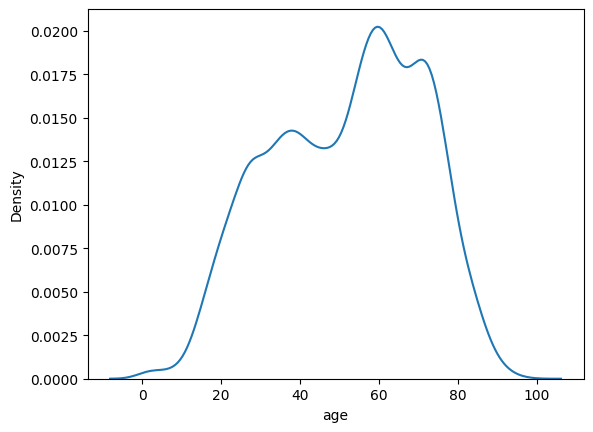

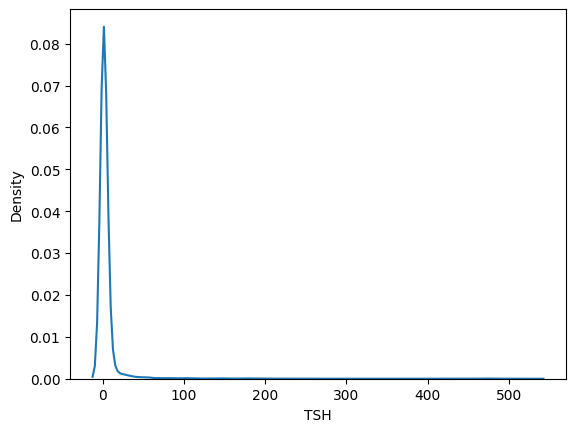

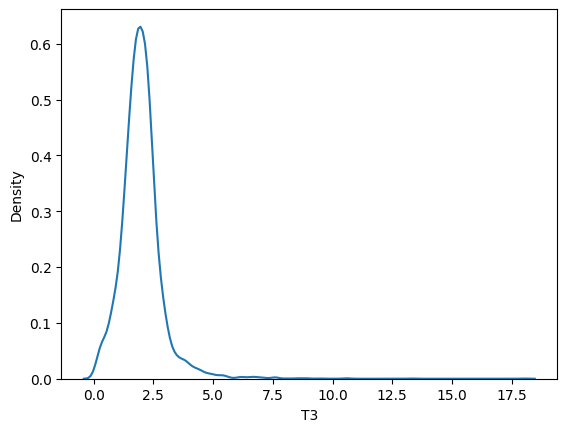

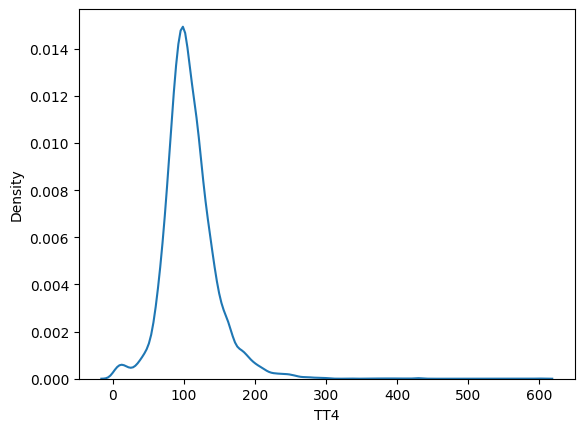

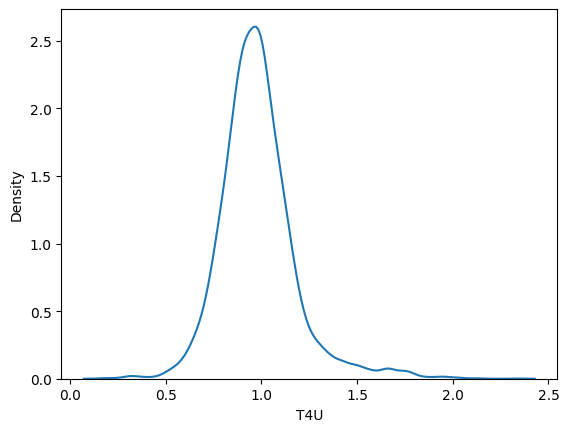

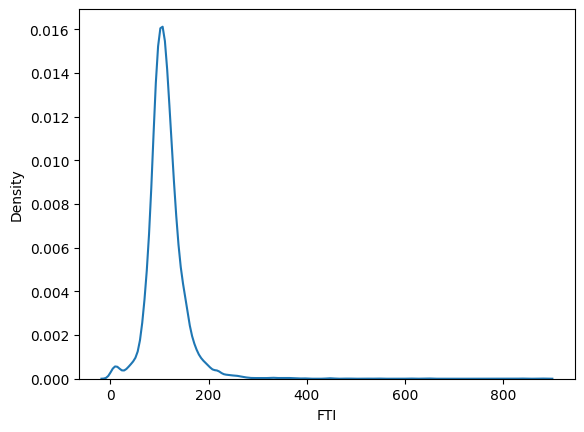

KeyError: 'Diagnosis'

In [26]:
for i in df.select_dtypes(exclude='object').columns:
    sns.kdeplot(X_train[i])
    plt.show()

In [26]:
X_train2.isna().sum()

age                             1
sex                           319
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           846
T3_measured                     0
T3                           2410
TT4_measured                    0
TT4                           468
T4U_measured                    0
T4U                           845
FTI_measured                    0
FTI                           837
referral_source                 0
dtype: int64

In [27]:
X_train.isna().sum()

age                            0
sex                          319
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
T4U_measured                   0
T4U                            0
FTI_measured                   0
FTI                            0
referral_source                0
dtype: int64

Before Imputation


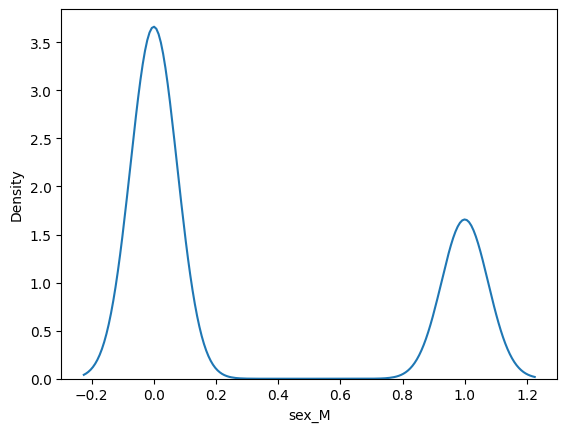

After Imputation 


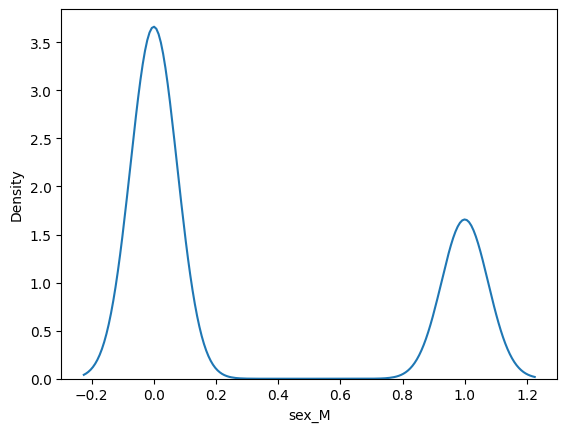

****************************************************************************************************
Before Imputation


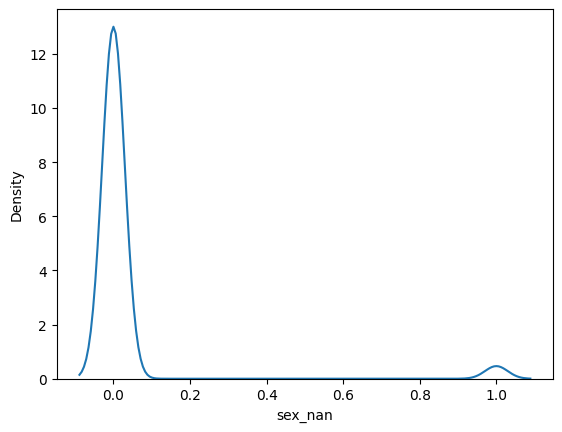

After Imputation 


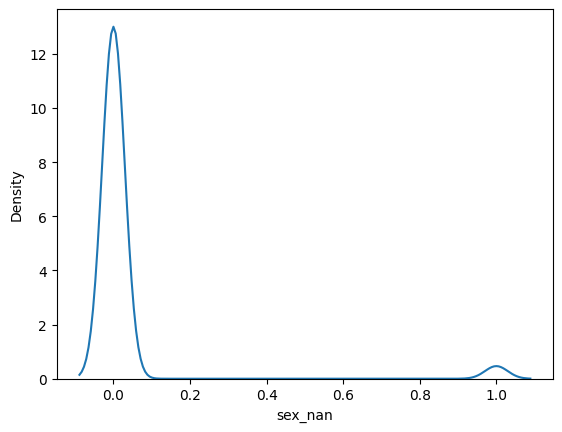

****************************************************************************************************
Before Imputation


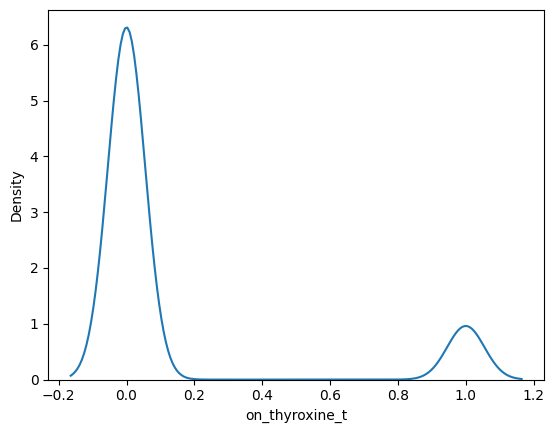

After Imputation 


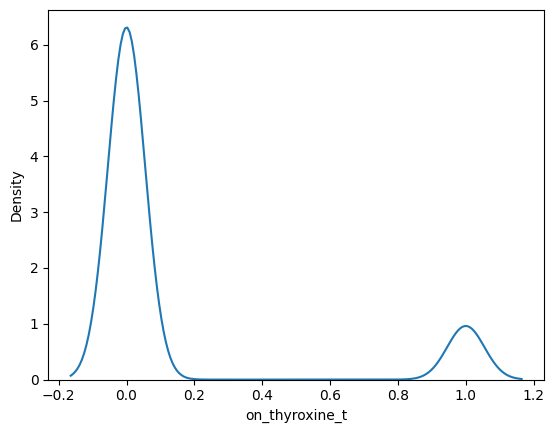

****************************************************************************************************
Before Imputation


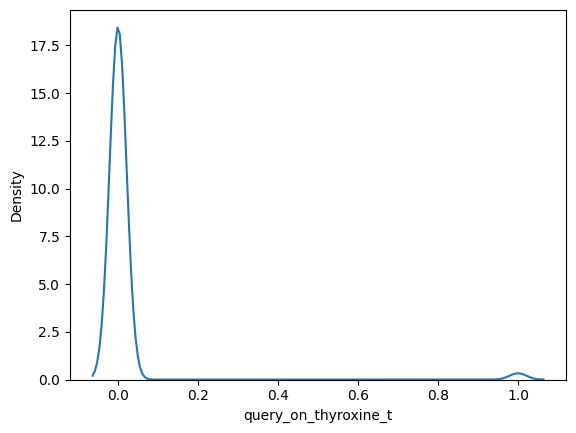

After Imputation 


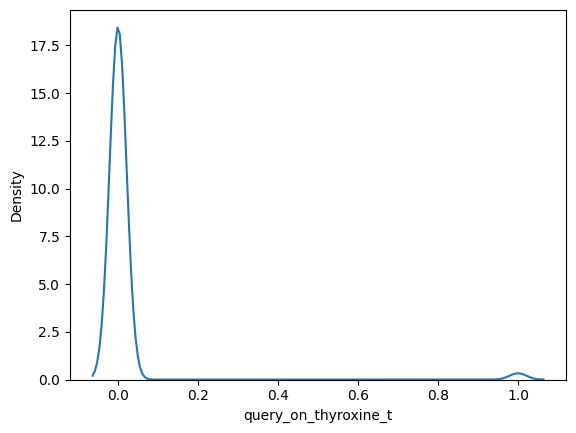

****************************************************************************************************
Before Imputation


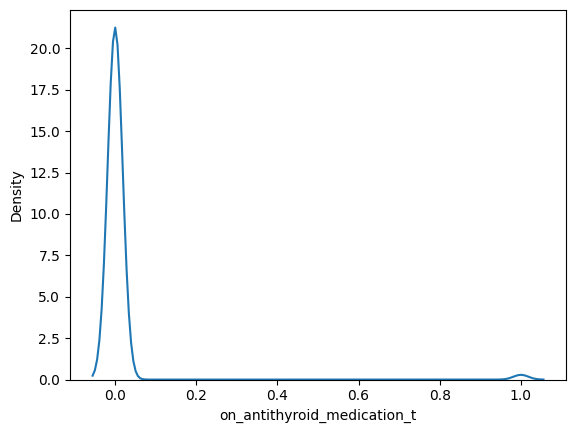

After Imputation 


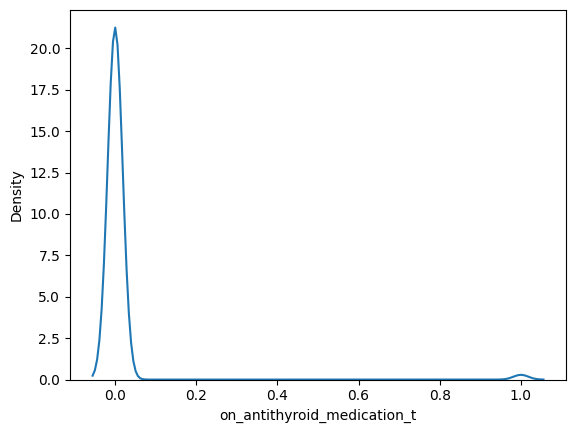

****************************************************************************************************
Before Imputation


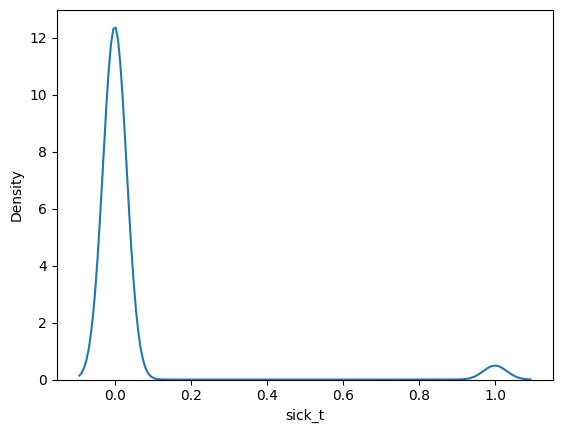

After Imputation 


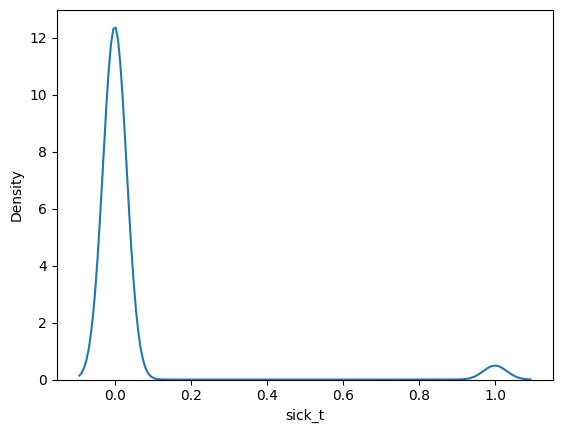

****************************************************************************************************
Before Imputation


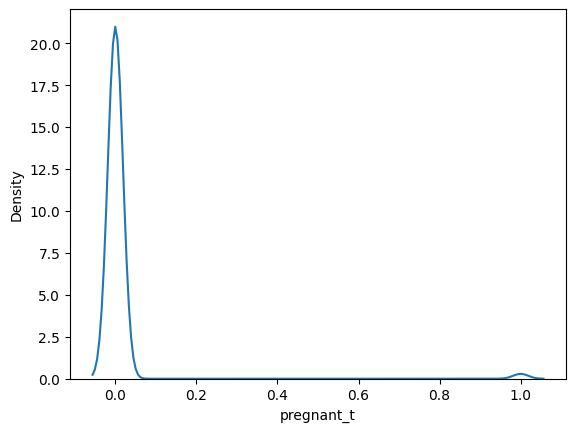

After Imputation 


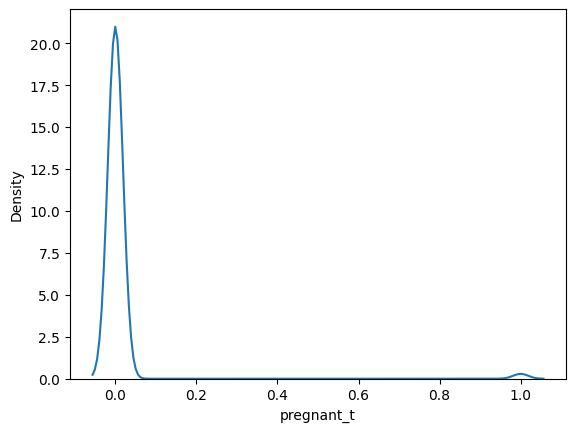

****************************************************************************************************
Before Imputation


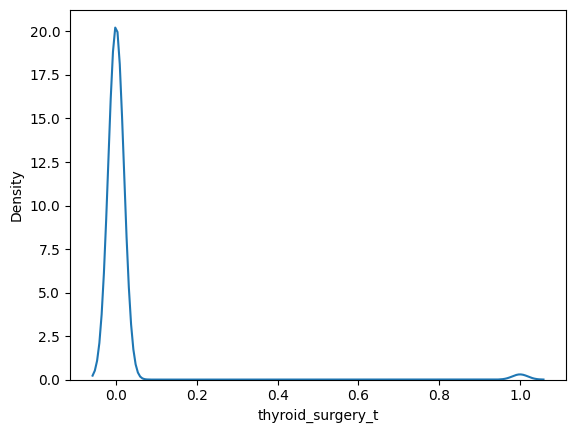

After Imputation 


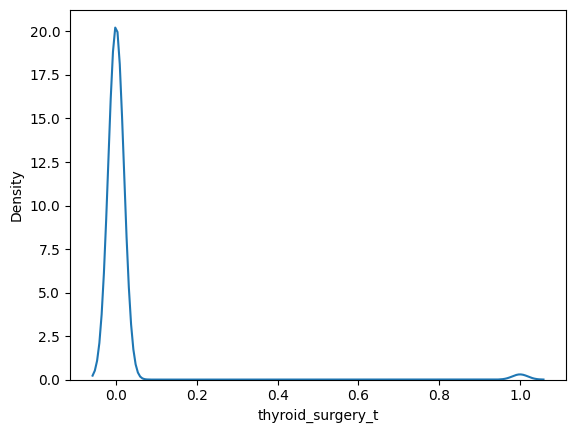

****************************************************************************************************
Before Imputation


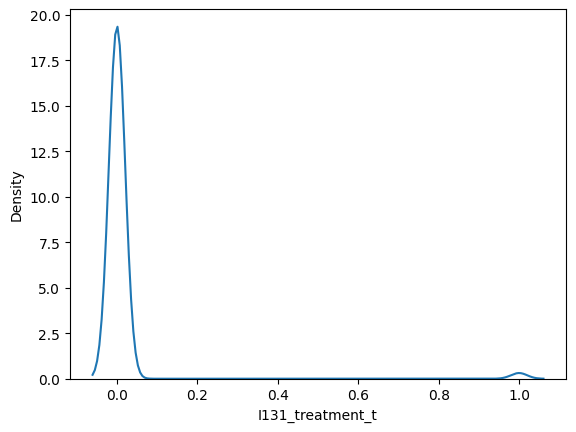

After Imputation 


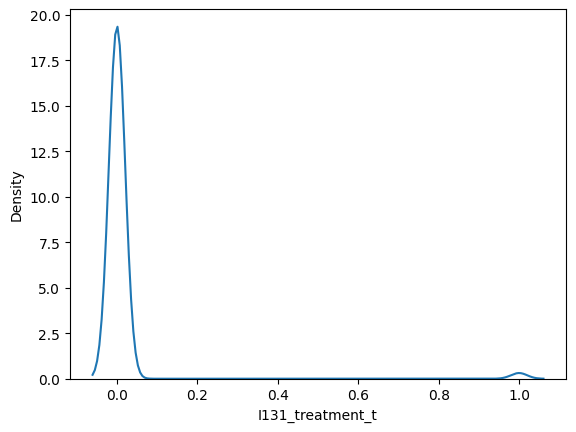

****************************************************************************************************
Before Imputation


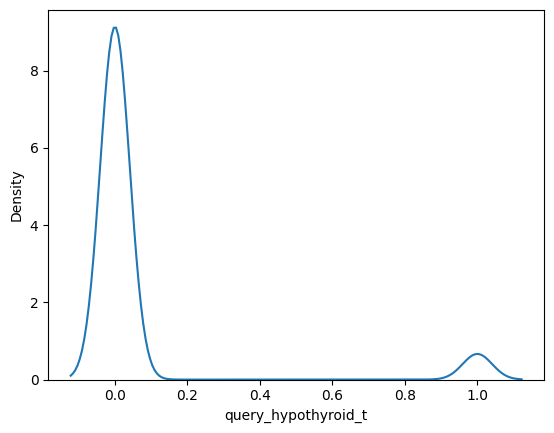

After Imputation 


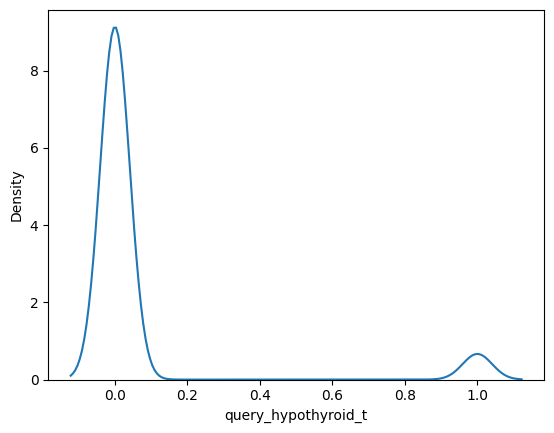

****************************************************************************************************
Before Imputation


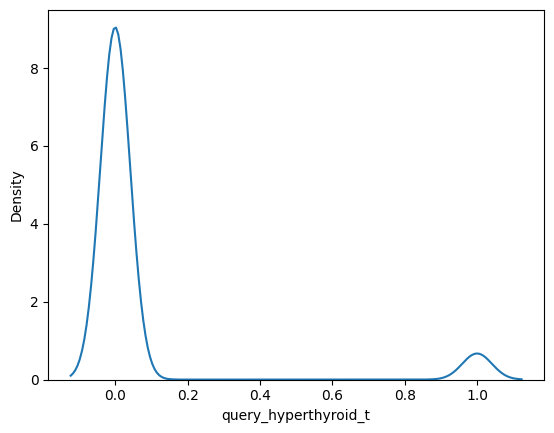

After Imputation 


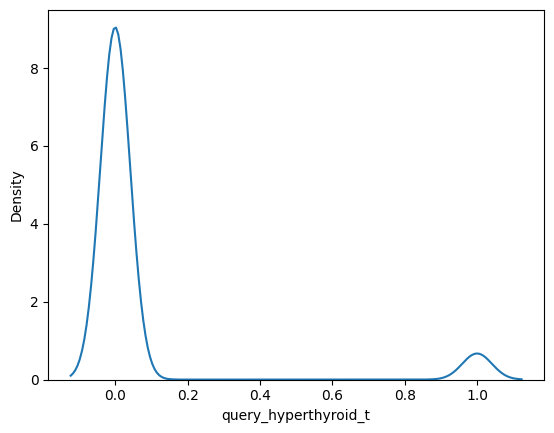

****************************************************************************************************
Before Imputation


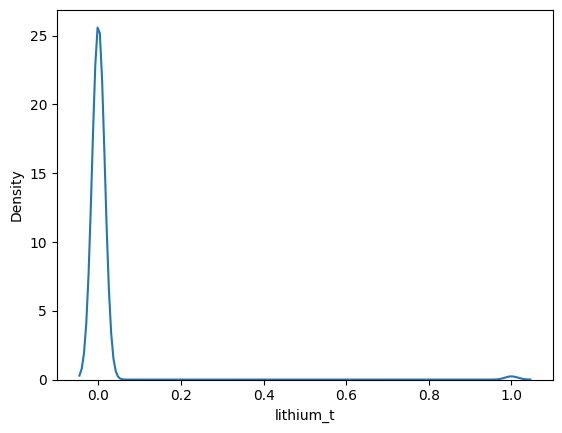

After Imputation 


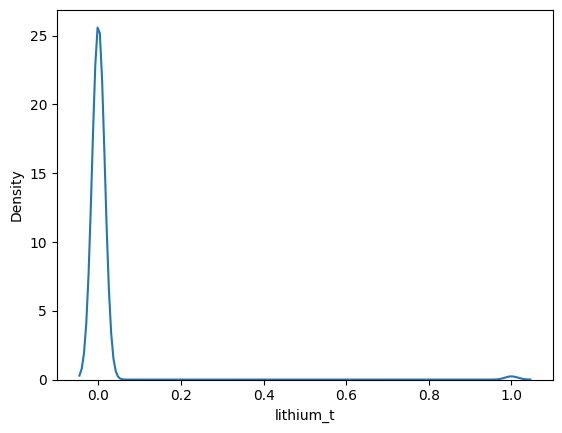

****************************************************************************************************
Before Imputation


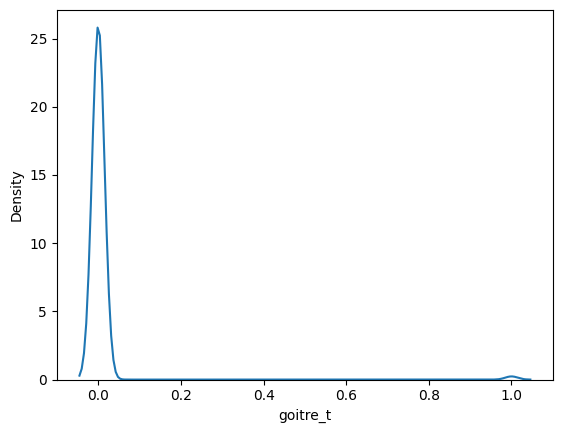

After Imputation 


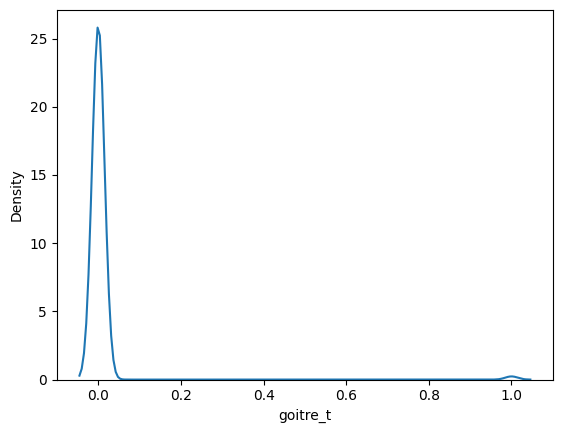

****************************************************************************************************
Before Imputation


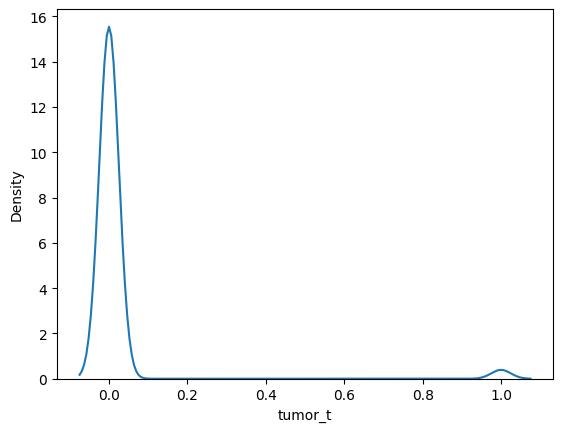

After Imputation 


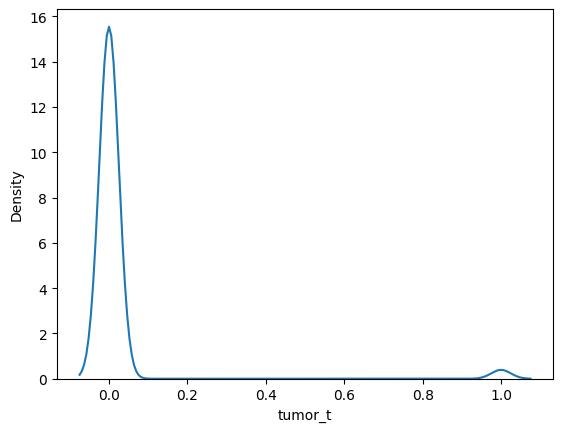

****************************************************************************************************
Before Imputation


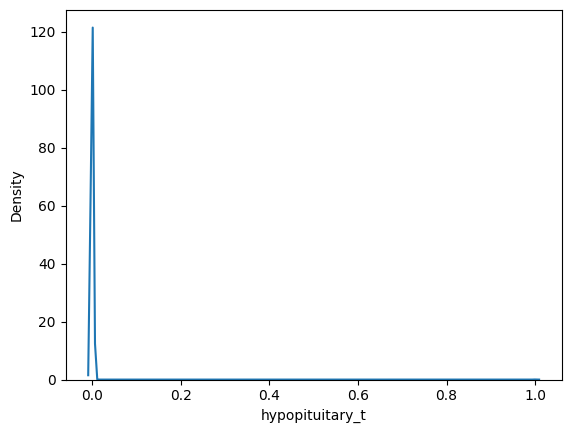

After Imputation 


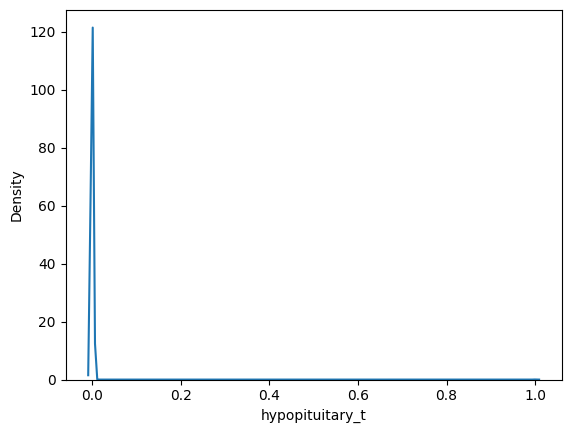

****************************************************************************************************
Before Imputation


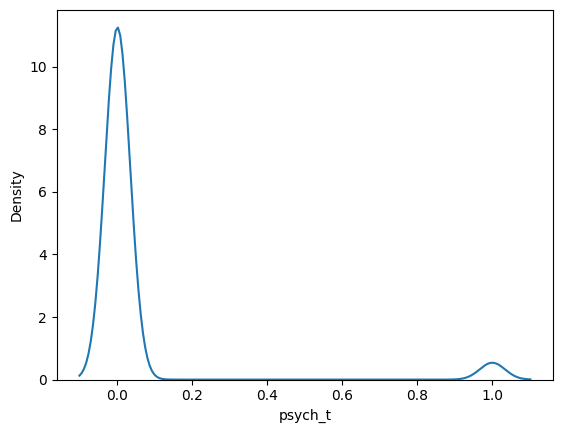

After Imputation 


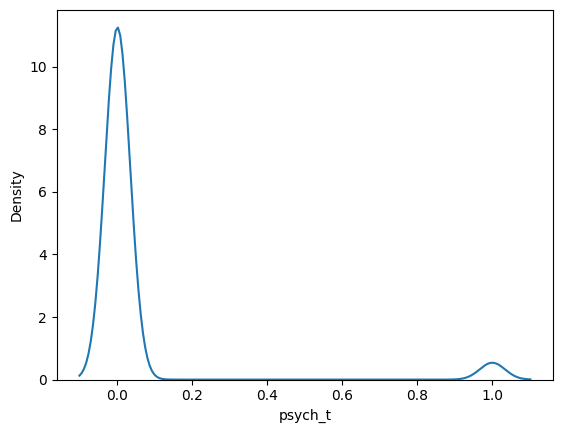

****************************************************************************************************
Before Imputation


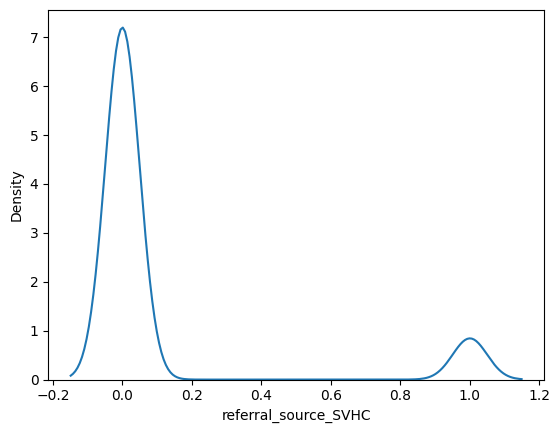

After Imputation 


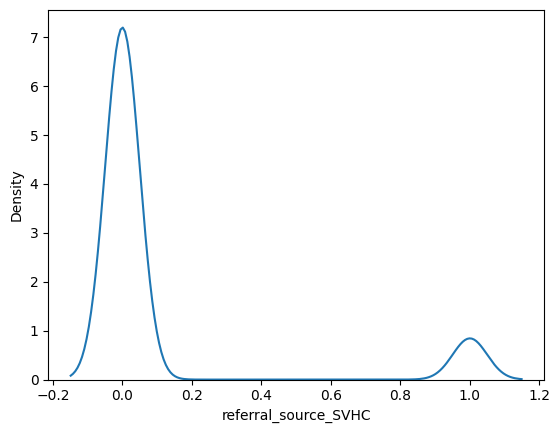

****************************************************************************************************
Before Imputation


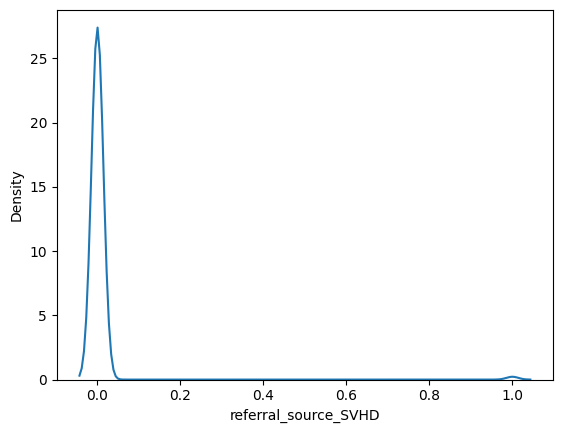

After Imputation 


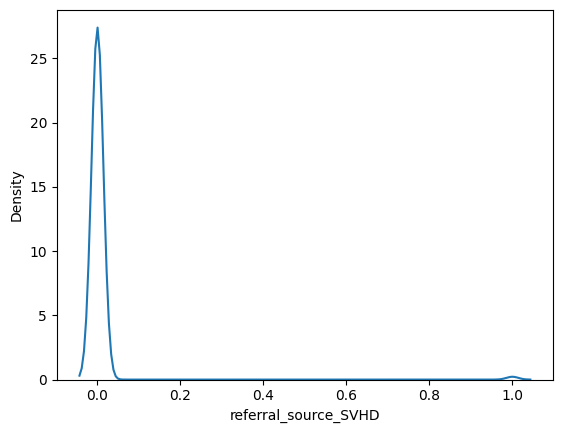

****************************************************************************************************
Before Imputation


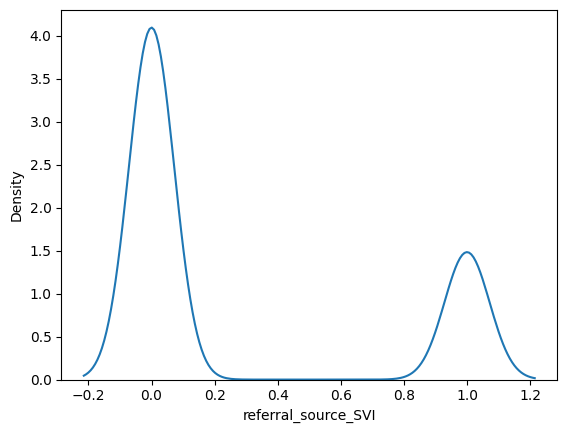

After Imputation 


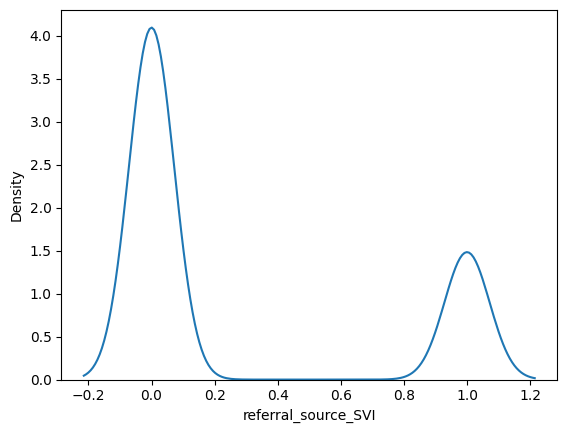

****************************************************************************************************
Before Imputation


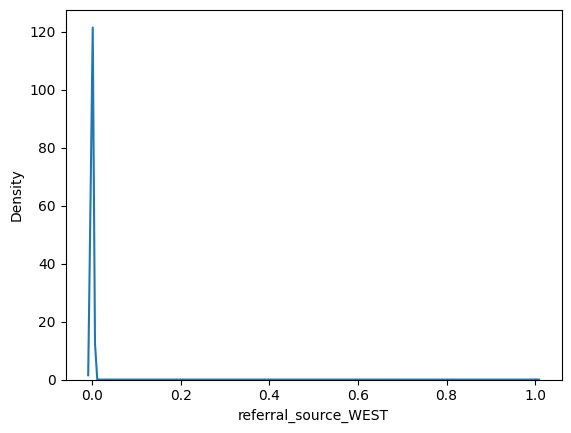

After Imputation 


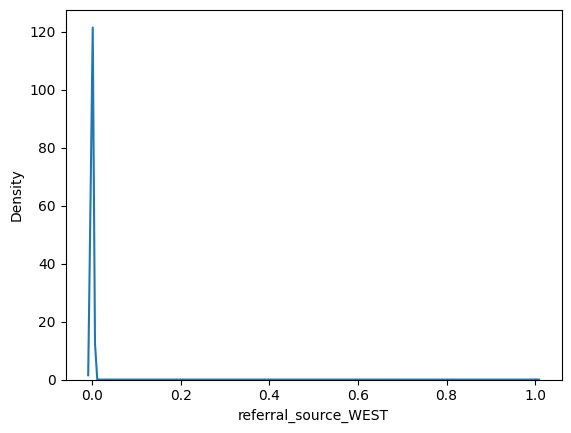

****************************************************************************************************
Before Imputation


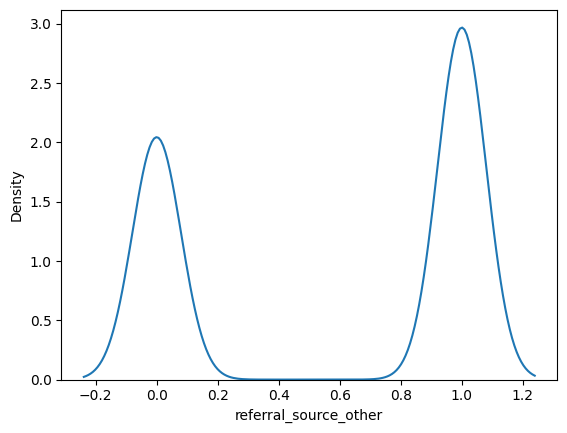

After Imputation 


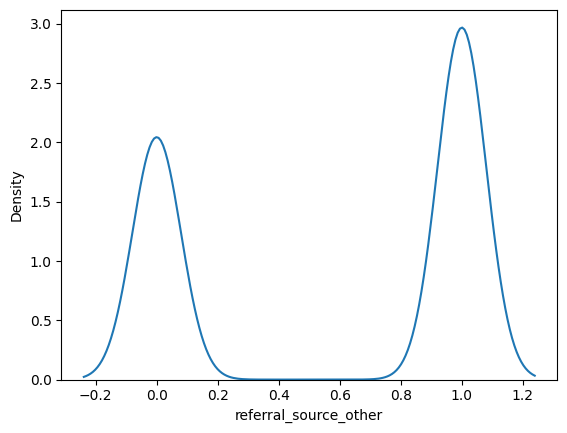

****************************************************************************************************
Before Imputation


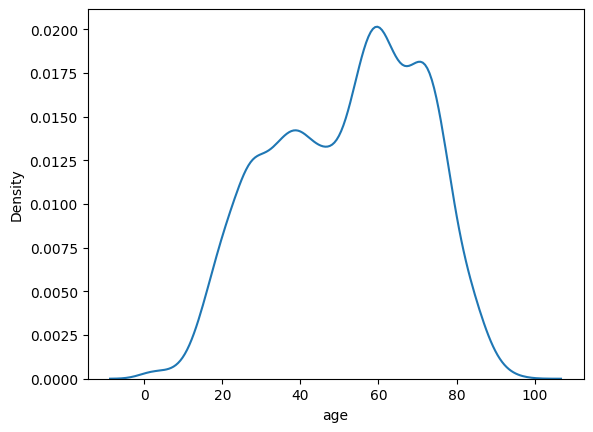

After Imputation 


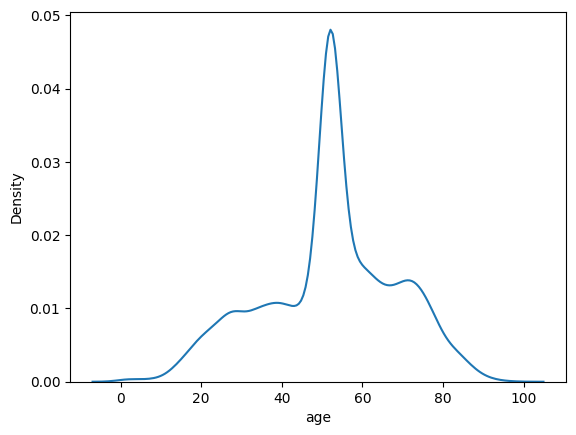

****************************************************************************************************
Before Imputation


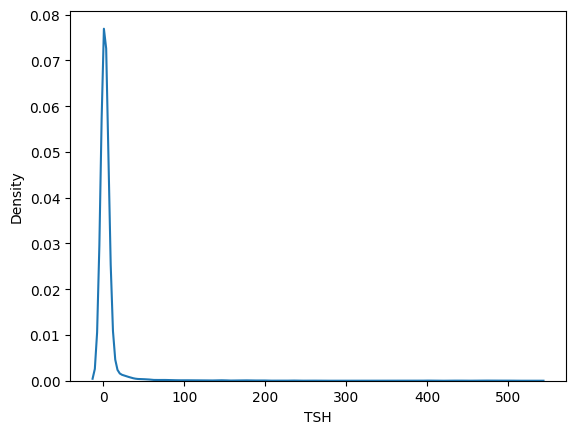

After Imputation 


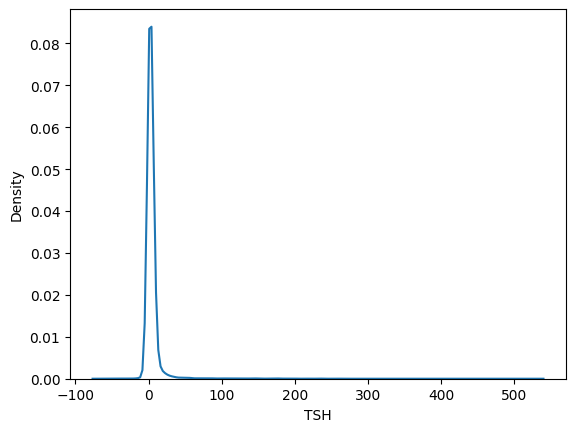

****************************************************************************************************
Before Imputation


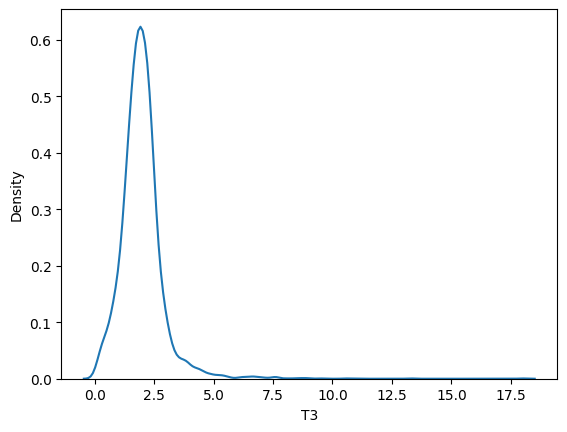

After Imputation 


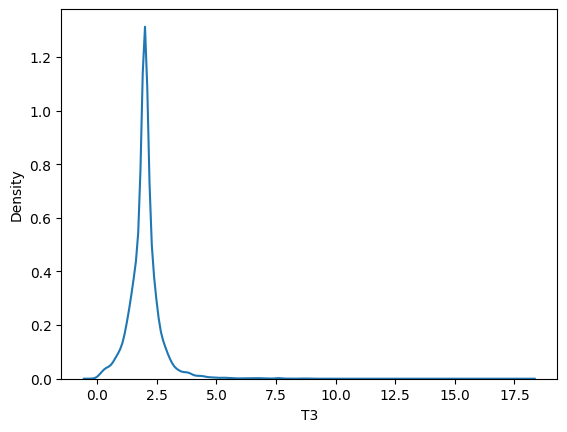

****************************************************************************************************
Before Imputation


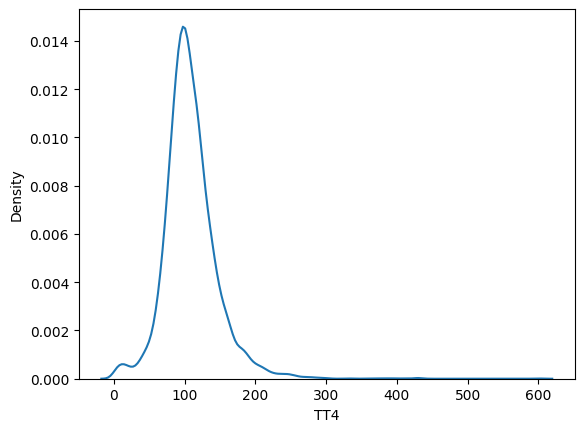

After Imputation 


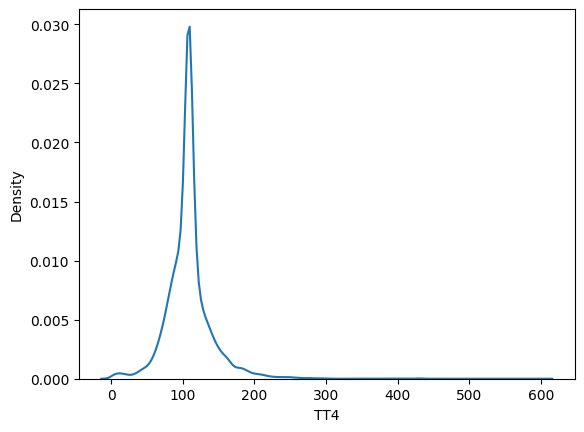

****************************************************************************************************
Before Imputation


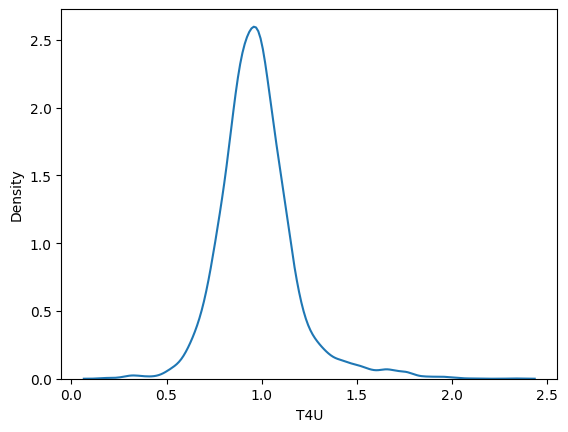

After Imputation 


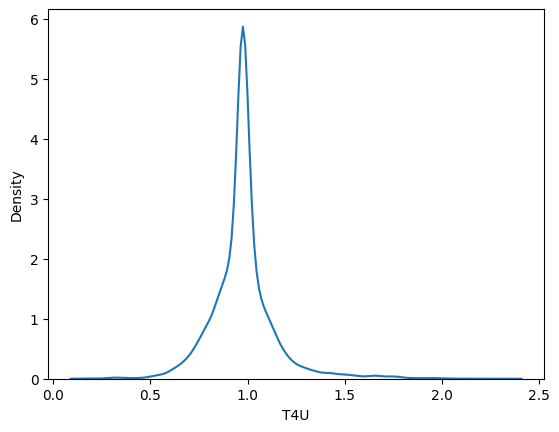

****************************************************************************************************
Before Imputation


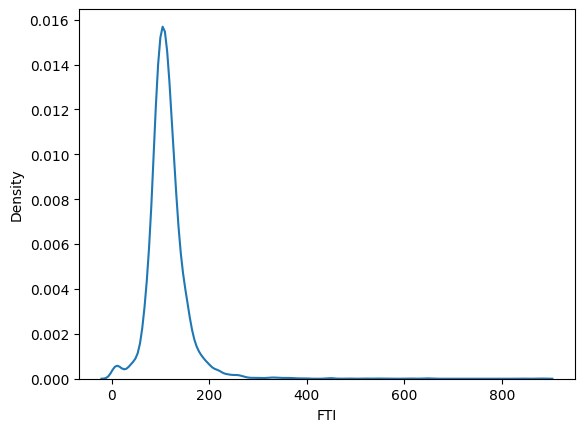

After Imputation 


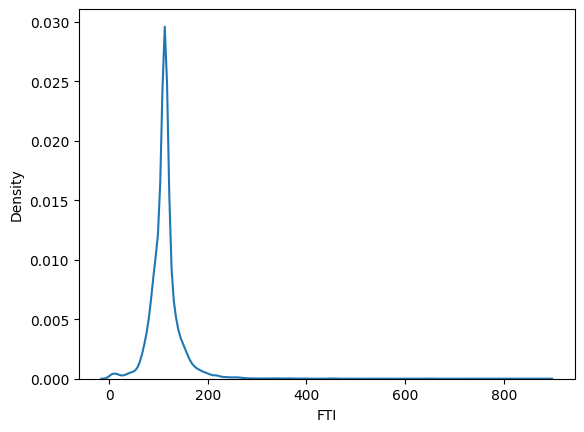

****************************************************************************************************


In [27]:
for i in X_test2.select_dtypes(exclude='object').columns:
    print('Before Imputation')
    sns.kdeplot(X_train2[i])
    plt.show()
    print('After Imputation ')
    sns.kdeplot(X_train_final[i])
    plt.show()
    print('*'*100)

# Multicollinearity check

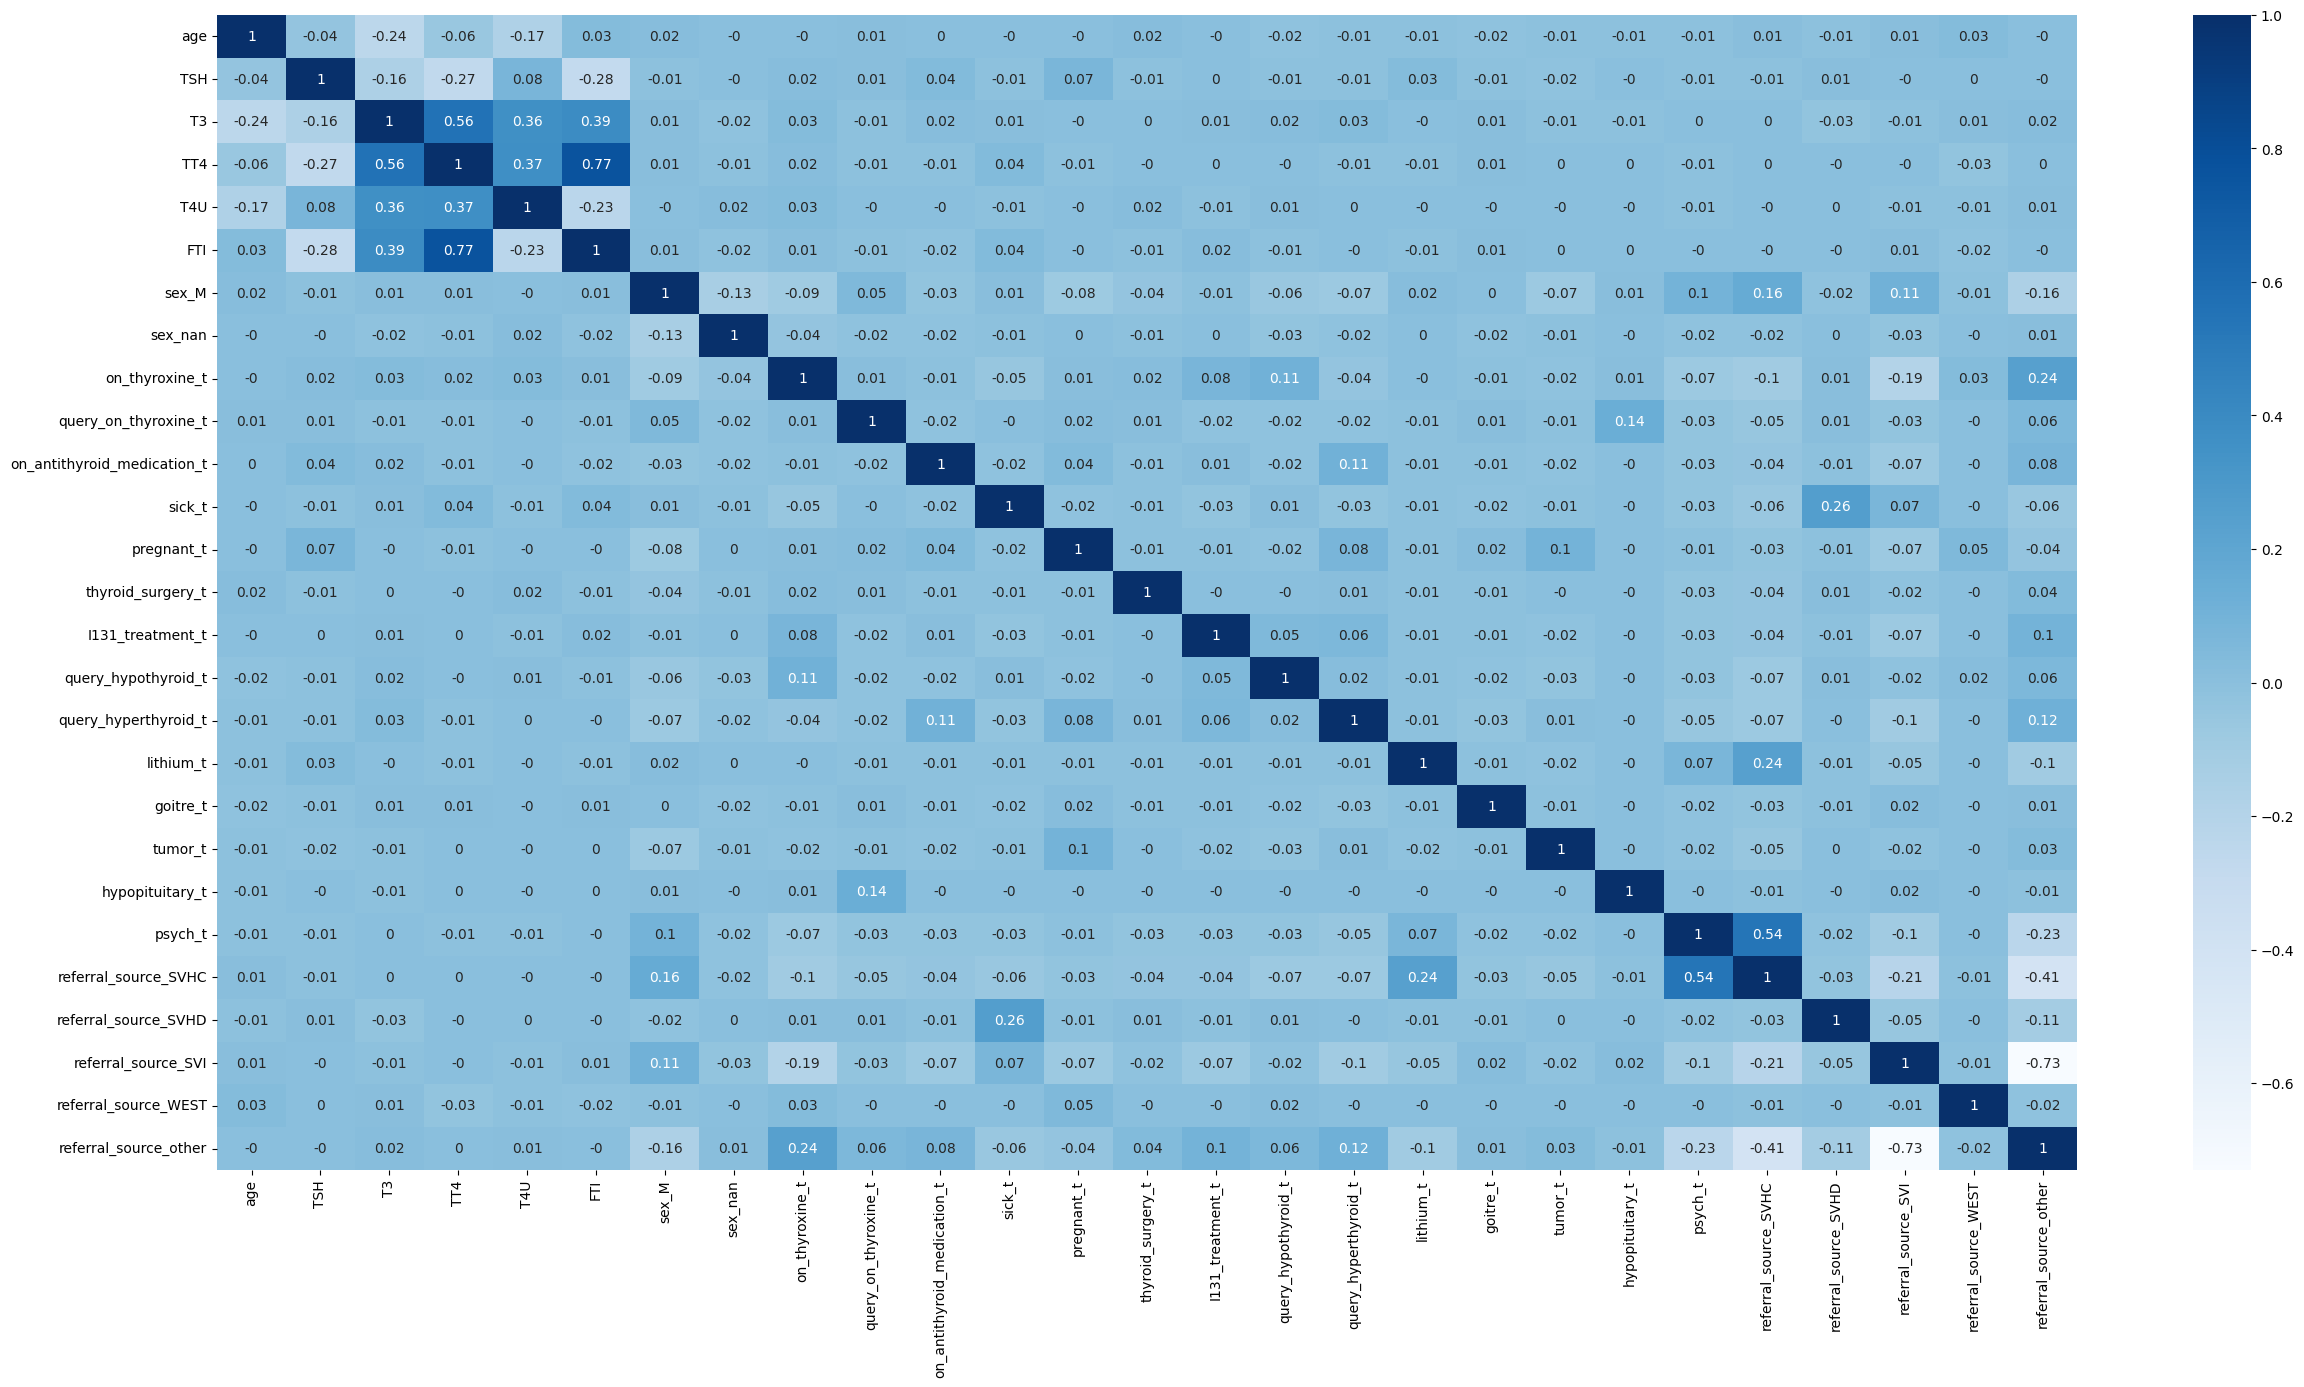

In [201]:
plt.figure(figsize=(30,15))
sns.heatmap(np.round(X_train2.corr(),2),annot=True,cmap='Blues')
plt.show()

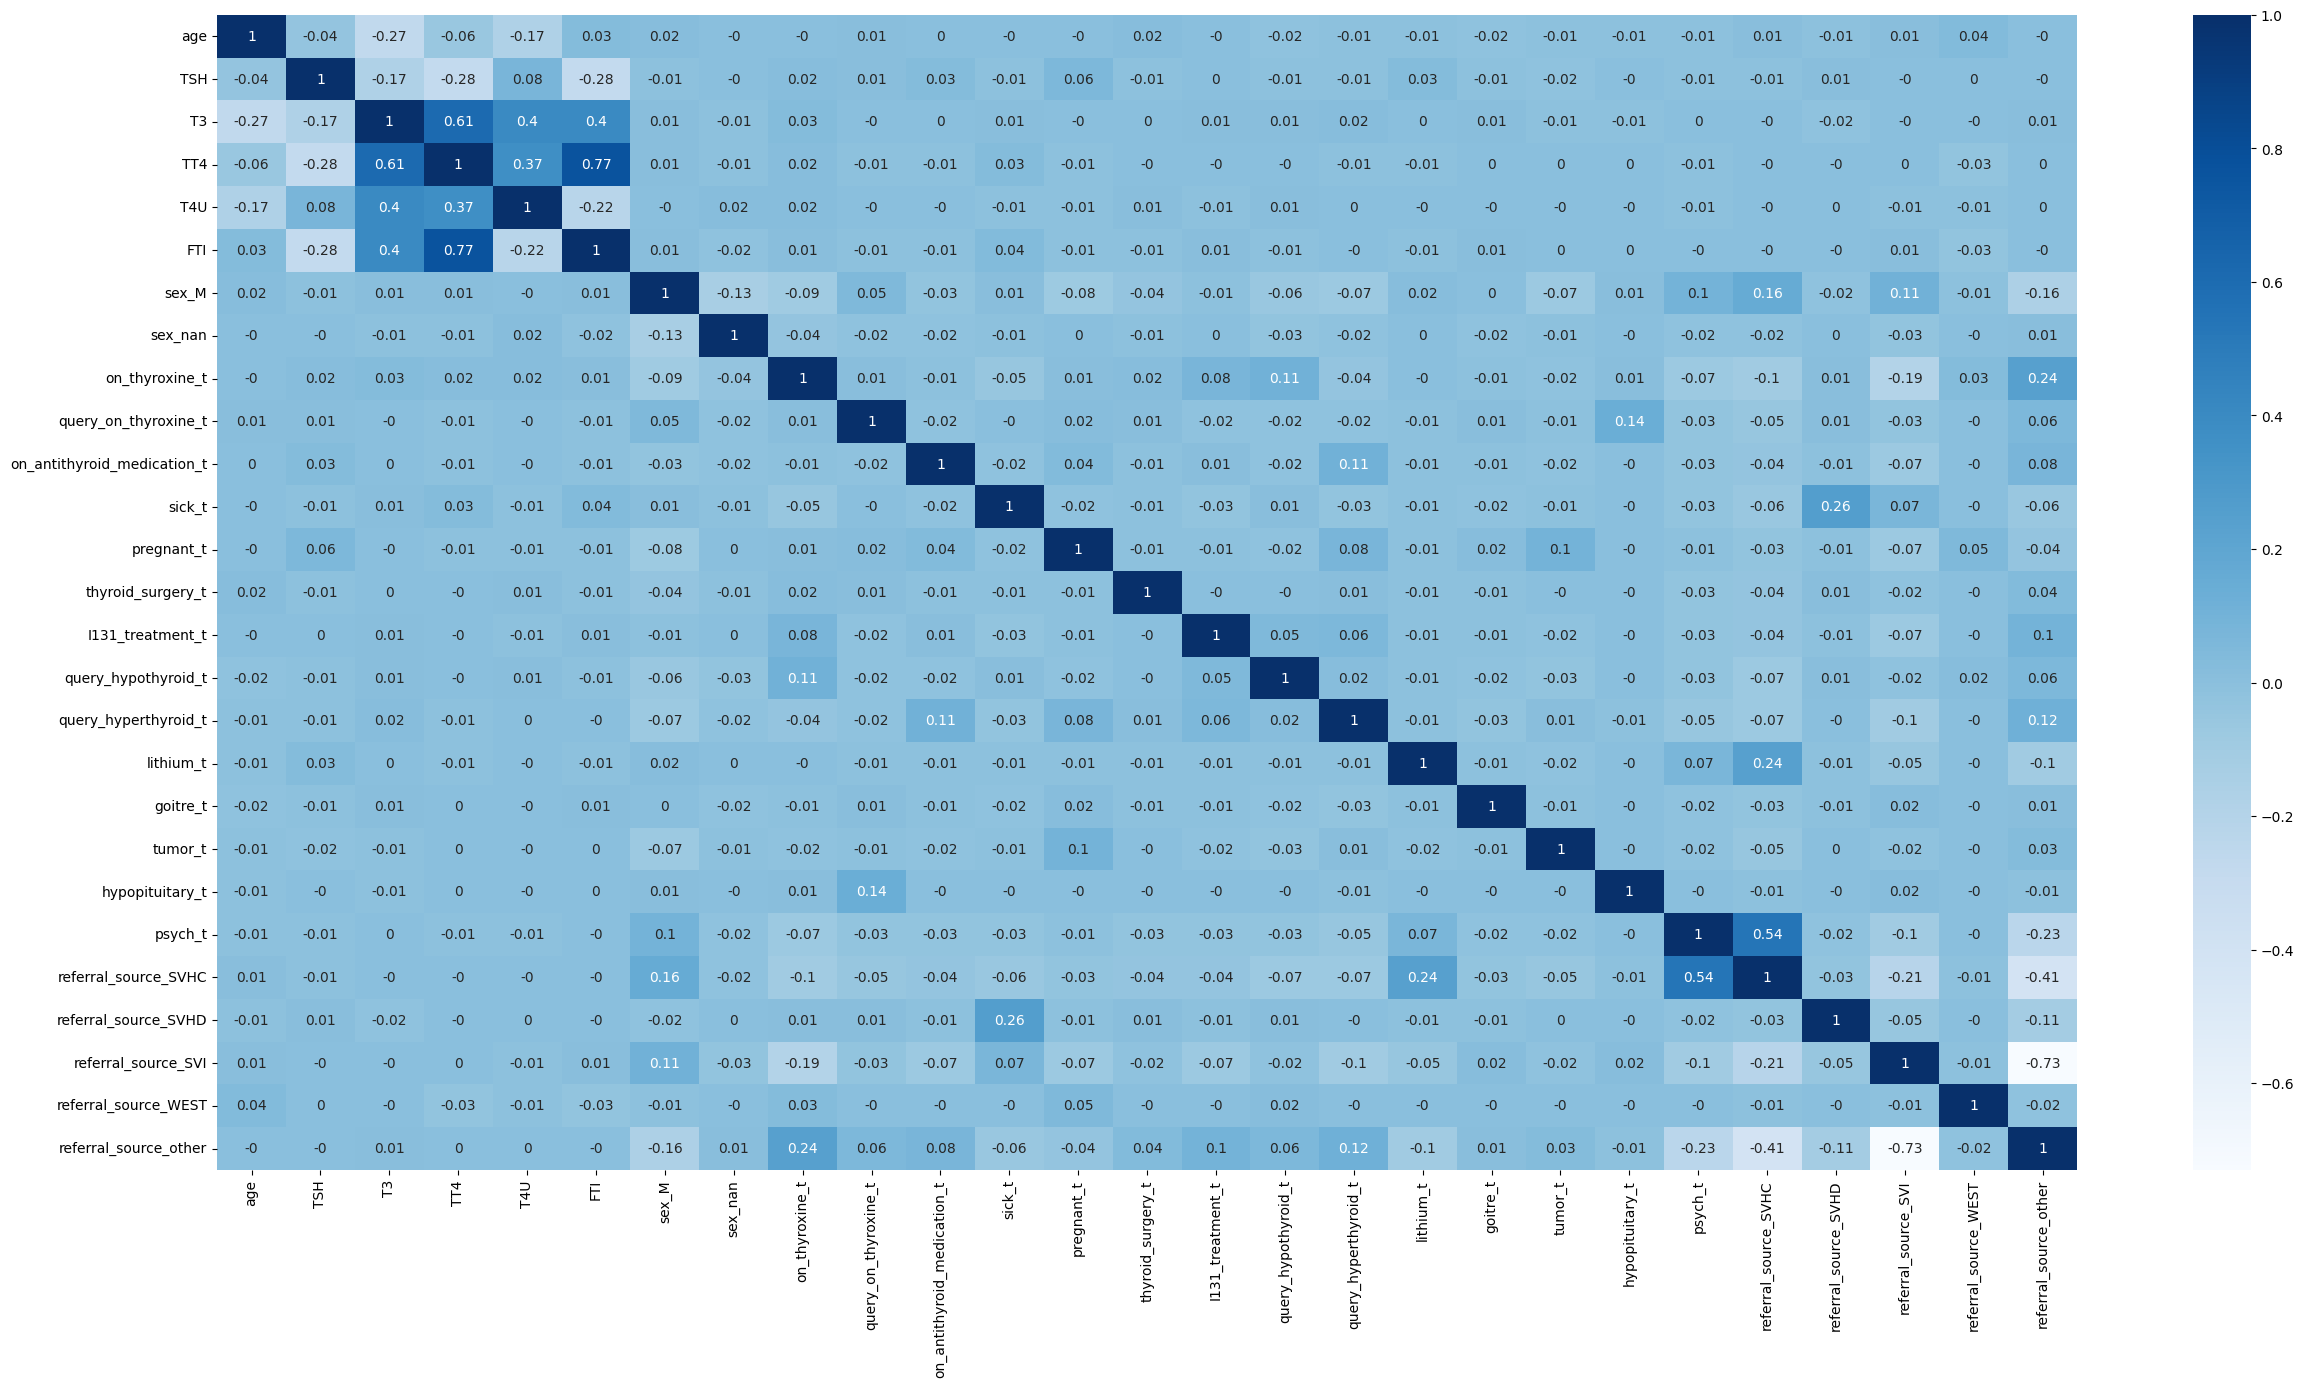

In [202]:
plt.figure(figsize=(30,15))
sns.heatmap(np.round(X_train_final.corr(),2),annot=True,cmap='Blues')
plt.show()

In [174]:
X_train_final.isna().sum()

age                               0
TSH                               0
T3                                0
TT4                               0
T4U                               0
FTI                               0
sex_M                          2262
sex_nan                        2262
on_thyroxine_t                 2262
query_on_thyroxine_t           2262
on_antithyroid_medication_t    2262
sick_t                         2262
pregnant_t                     2262
thyroid_surgery_t              2262
I131_treatment_t               2262
query_hypothyroid_t            2262
query_hyperthyroid_t           2262
lithium_t                      2262
goitre_t                       2262
tumor_t                        2262
hypopituitary_t                2262
psych_t                        2262
referral_source_SVHC           2262
referral_source_SVHD           2262
referral_source_SVI            2262
referral_source_WEST           2262
referral_source_other          2262
dtype: int64

# VIF

In [28]:
X=X_train_final[X_train_final.columns]
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                        Feature         VIF
0                         const  187.490695
1                         sex_M    1.091011
2                       sex_nan    1.028170
3                on_thyroxine_t    1.095775
4          query_on_thyroxine_t    1.031911
5   on_antithyroid_medication_t    1.025366
6                        sick_t    1.087376
7                    pregnant_t    1.174213
8             thyroid_surgery_t    1.006284
9              I131_treatment_t    1.020352
10          query_hypothyroid_t    1.025192
11         query_hyperthyroid_t    1.051481
12                    lithium_t    1.073002
13                     goitre_t    1.005521
14                      tumor_t    1.022610
15              hypopituitary_t    1.020169
16                      psych_t    1.430166
17         referral_source_SVHC    5.333067
18         referral_source_SVHD    1.395256
19          referral_source_SVI    8.773635
20         referral_source_WEST    1.015984
21        referral_source_other 



### Interpretation of VIF
VIF = 1: There is no correlation between the predictor and the other predictors. No multicollinearity.

1 < VIF < 5: There is moderate correlation between the predictor and the other predictors, but it is not severe enough to require corrective action.

VIF > 5: There is high correlation between the predictor and the other predictors, indicating significant multicollinearity. This is a rule of thumb, and in some disciplines, a VIF threshold of 10 is used instead.

VIF > 10: This indicates very high multicollinearity and suggests that the regression coefficients are poorly estimated and highly sensitive to changes in the model.
Consequences of High Multicollinearity

Unstable Coefficients: Multicollinearity can lead to large variances and covariances of the estimated regression coefficients, making them unstable and sensitive to small changes in the model.

Insignificant Predictors: Even if the overall model fits the data well, multicollinearity can cause individual predictors to appear insignificant (high p-values), even though they may be important.

Misleading Results: The presence of multicollinearity can make it difficult to determine the effect of each predictor, leading to potentially misleading conclusions about the relationships between variables.

### Detecting Multicollinearity
Apart from calculating VIF, other methods to detect multicollinearity include:

Correlation Matrix: Inspecting the correlation matrix for high correlations (above 0.8 or below -0.8) between pairs of predictors.

Condition Index: A condition index above 30 indicates severe multicollinearity.
### Addressing Multicollinearity
Remove Variables: Removing one of the highly correlated predictors can help reduce multicollinearity.

Combine Variables: Combining correlated predictors into a single predictor can reduce multicollinearity.

Principal Component Analysis (PCA): Using PCA to transform the correlated predictors into a smaller set of uncorrelated components.

Ridge Regression: Using ridge regression, which adds a penalty to the regression to shrink the coefficients and reduce multicollinearity effects.

In this scenario, where both columns have high VIF values indicating multicollinearity, the decision on which column to remove typically depends on several factors:

1. **Relevance to the Model:** Consider which variable is more theoretically or practically relevant to your model. The variable that is more important for explaining the outcome of interest may be retained.

2. **Statistical Significance:** Evaluate the statistical significance of each variable. Variables with lower significance (higher p-values) might be candidates for removal, especially if they are highly correlated with other predictors.

3. **Impact on Model Fit:** Removing a variable with a higher VIF can potentially improve the overall model fit and reduce multicollinearity. 

4. **Context and Purpose:** Consider the context of your analysis and the specific goals of your model. Sometimes domain knowledge or specific hypotheses may guide the decision.

Given the VIF values provided (10.34 for column1 and 9.32 for column2), both are quite high, suggesting strong multicollinearity. In practice, you might consider removing the variable with the higher VIF (column1 in this case, since it has a slightly higher VIF), or the one that is less theoretically important or statistically significant. However, the final decision should be guided by a thorough understanding of your data and the goals of your analysis.

In [29]:
X_train_final.drop(['FTI'],axis=1,inplace=True)
X_test_final.drop(['FTI'],axis=1,inplace=True)

In [30]:
X=X_train_final[X_train_final.columns]
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                        Feature        VIF
0                         const  97.437064
1                         sex_M   1.090920
2                       sex_nan   1.028140
3                on_thyroxine_t   1.095697
4          query_on_thyroxine_t   1.031824
5   on_antithyroid_medication_t   1.024832
6                        sick_t   1.087373
7                    pregnant_t   1.174163
8             thyroid_surgery_t   1.006249
9              I131_treatment_t   1.020119
10          query_hypothyroid_t   1.024868
11         query_hyperthyroid_t   1.050915
12                    lithium_t   1.072939
13                     goitre_t   1.005402
14                      tumor_t   1.022580
15              hypopituitary_t   1.020159
16                      psych_t   1.430057
17         referral_source_SVHC   5.333002
18         referral_source_SVHD   1.395247
19          referral_source_SVI   8.773619
20         referral_source_WEST   1.015951
21        referral_source_other  10.144602
22         

In [89]:
df['referral_source'].value_counts()

referral_source
other    7125
SVI      3165
SVHC     1231
STMW      346
SVHD      102
WEST        3
Name: count, dtype: int64

In [31]:
X_train_final.drop(['referral_source_SVI'],axis=1,inplace=True)
X_test_final.drop(['referral_source_SVI'],axis=1,inplace=True)

In [32]:
X=X_train_final[X_train_final.columns]
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

                        Feature        VIF
0                         const  60.301728
1                         sex_M   1.080786
2                       sex_nan   1.024133
3                on_thyroxine_t   1.094378
4          query_on_thyroxine_t   1.031679
5   on_antithyroid_medication_t   1.023844
6                        sick_t   1.085560
7                    pregnant_t   1.042174
8             thyroid_surgery_t   1.005914
9              I131_treatment_t   1.020118
10          query_hypothyroid_t   1.024514
11         query_hyperthyroid_t   1.050114
12                    lithium_t   1.072926
13                     goitre_t   1.004807
14                      tumor_t   1.020723
15              hypopituitary_t   1.020141
16                      psych_t   1.429908
17         referral_source_SVHC   1.749290
18         referral_source_SVHD   1.091760
19         referral_source_WEST   1.007624
20        referral_source_other   1.341282
21                          age   1.110987
22         

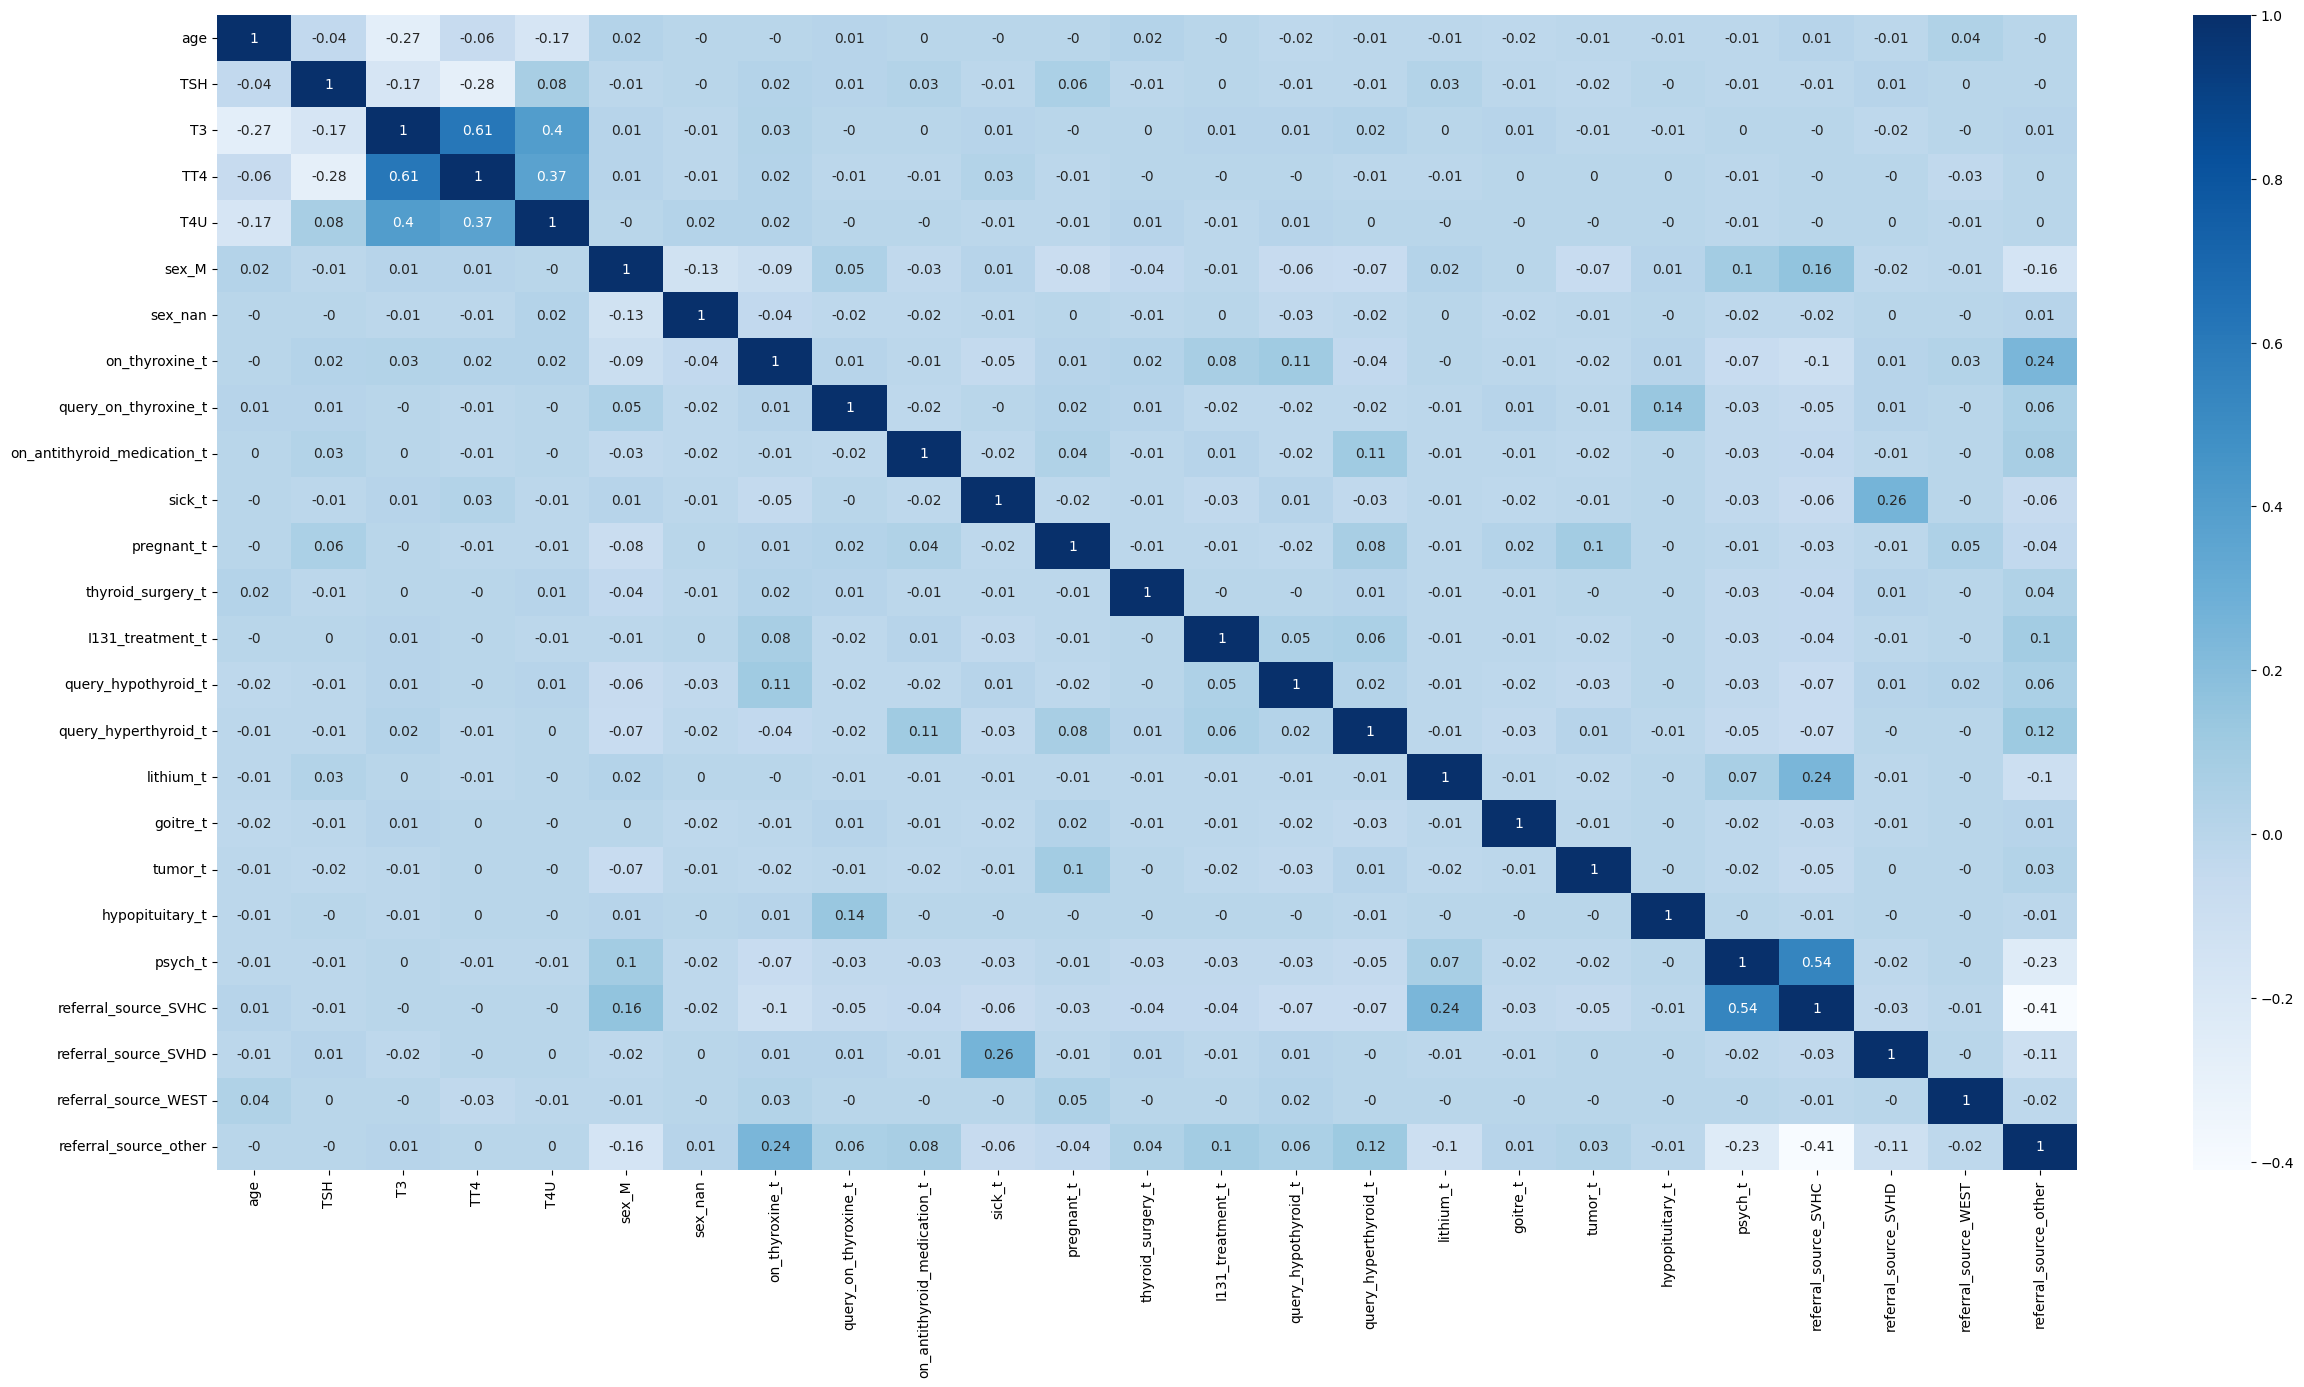

In [210]:
plt.figure(figsize=(30,15))
sns.heatmap(np.round(X_train_final.corr(),2),annot=True,cmap='Blues')
plt.show()

# Condition Number

In [33]:
X=X_train_final[X_train_final.columns].values
singular_values = np.linalg.svd(X, compute_uv=False)

# Calculate the condition number as the ratio of the largest to the smallest singular value
condition_number = singular_values[0] / singular_values[-1]

print("Condition Number:", condition_number)

Condition Number: 6862.118536244152


Low Individual VIFs: Indicates no single predictor has high multicollinearity.

High Condition Number: Suggests multicollinearity among combinations of predictors.

Actionable Steps: Standardize data, apply PCA, or use regularization techniques like Ridge Regression to address multicollinearity.

By following these steps, you can better manage multicollinearity and improve the stability and reliability of your regression models.

In [34]:
X_train_final.isna().sum()

sex_M                          0
sex_nan                        0
on_thyroxine_t                 0
query_on_thyroxine_t           0
on_antithyroid_medication_t    0
sick_t                         0
pregnant_t                     0
thyroid_surgery_t              0
I131_treatment_t               0
query_hypothyroid_t            0
query_hyperthyroid_t           0
lithium_t                      0
goitre_t                       0
tumor_t                        0
hypopituitary_t                0
psych_t                        0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_WEST           0
referral_source_other          0
age                            0
TSH                            0
T3                             0
TT4                            0
T4U                            0
dtype: int64

In [35]:
scaler = StandardScaler()
X_train_scaled_final = scaler.fit_transform(X_train_final)
X_test_scaled_final = scaler.transform(X_test_final)

In [94]:
X_train_scaled_final

array([[-0.67263852, -0.18941778, -0.39011263, ...,  0.27823322,
         0.10424712,  0.15344931],
       [-0.67263852, -0.18941778,  2.56336231, ..., -0.13849877,
         0.60262987,  0.2566731 ],
       [-0.67263852, -0.18941778, -0.39011263, ..., -0.03306812,
        -0.00903586, -0.00655848],
       ...,
       [-0.67263852, -0.18941778,  2.56336231, ...,  0.23607054,
         0.44624262, -0.040317  ],
       [-0.67263852, -0.18941778, -0.39011263, ..., -0.20043716,
         0.03963578, -0.64618949],
       [-0.67263852, -0.18941778, -0.39011263, ...,  0.370617  ,
         0.50879752, -1.19147473]])

In [36]:
X_=pd.DataFrame(np.round(X_train_scaled_final,2),columns=scaler.get_feature_names_out())

In [37]:

X_ = sm.add_constant(X_)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_.columns
vif_data["VIF"] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]

# Display the VIF values
print(vif_data)

                        Feature       VIF
0                         const  1.000140
1                         sex_M  1.080786
2                       sex_nan  1.024143
3                on_thyroxine_t  1.094392
4          query_on_thyroxine_t  1.031679
5   on_antithyroid_medication_t  1.023832
6                        sick_t  1.085550
7                    pregnant_t  1.042177
8             thyroid_surgery_t  1.005916
9              I131_treatment_t  1.020122
10          query_hypothyroid_t  1.024488
11         query_hyperthyroid_t  1.050085
12                    lithium_t  1.072940
13                     goitre_t  1.004799
14                      tumor_t  1.020730
15              hypopituitary_t  1.020141
16                      psych_t  1.429894
17         referral_source_SVHC  1.749291
18         referral_source_SVHD  1.091749
19         referral_source_WEST  1.007625
20        referral_source_other  1.341282
21                          age  1.110964
22                          TSH  1

In [38]:
singular_values = np.linalg.svd(X_train_scaled_final, compute_uv=False)

# Calculate the condition number as the ratio of the largest to the smallest singular value
condition_number = singular_values[0] / singular_values[-1]

print("Condition Number:", condition_number)

Condition Number: 2.4682173806916436


# Since everythings looks perfect as we reduced or removed the multicollinearity from the data

array([[-0.67263852, -0.18941778, -0.39011263, ...,  0.27823322,
         0.10424712,  0.15344931],
       [-0.67263852, -0.18941778,  2.56336231, ..., -0.13849877,
         0.60262987,  0.2566731 ],
       [-0.67263852, -0.18941778, -0.39011263, ..., -0.03306812,
        -0.00903586, -0.00655848],
       ...,
       [-0.67263852, -0.18941778,  2.56336231, ...,  0.23607054,
         0.44624262, -0.040317  ],
       [-0.67263852, -0.18941778, -0.39011263, ..., -0.20043716,
         0.03963578, -0.64618949],
       [-0.67263852, -0.18941778, -0.39011263, ...,  0.370617  ,
         0.50879752, -1.19147473]])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [40]:
brf = RandomForestClassifier()
brf.fit(X_train_scaled_final, Y_train)
# Predict and evaluate
y_pred = brf.predict(X_test_scaled_final)
print(accuracy_score(Y_test, y_pred))


c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7353825593050451


In [41]:
X_train_scaled_final.shape,Y_train.shape

((8979, 25), (8979, 1))

In [43]:
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train_scaled_final,Y_train)

y_pred = brf.predict(X_test_scaled_final)
print(accuracy_score(Y_test, y_pred))

c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this wa

0.011025726695623121


In [44]:
0.011025726695623121*100

1.1025726695623121

In [162]:
X_train_scaled_final.shape,Y_train.shape

((8979, 25), (8979, 1))

In [47]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply BorderlineSMOTE to the training data
borderline_smote = BorderlineSMOTE(random_state=42,k_neighbors=5)


In [48]:
X_train_res, y_train_res = borderline_smote.fit_resample(X_train_scaled_final, Y_train)


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [171]:
np.array(Y_train).ravel()

array(['-', '-', '-', ..., '-', '-', '-'], dtype=object)

In [172]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to the training data
random_oversampler = RandomOverSampler(random_state=42)
X_train_res, y_train_res = random_oversampler.fit_resample(X_train_scaled_final,  np.array(Y_train).ravel())

# Display the number of samples in each class after RandomOverSampler
print("Class distribution after RandomOverSampler:")
#print(y_train_res.value_counts())

# Train a RandomForestClassifier on the balanced dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = rf.predict(X_test_scaled_final)
print("accuracy :",accuracy_score(Y_test,y_pred))
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Class distribution after RandomOverSampler:
accuracy : 0.25760106916137654

Confusion Matrix:
[[644  44  20 ...  14 170  10]
 [ 13   5   1 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   2   0   0]
 [ 15   1   3 ...   0   8   0]
 [  6   1   0 ...   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           -       0.76      0.29      0.42      2209
           A       0.09      0.11      0.10        45
          AK       0.00      0.00      0.00        17
           B       0.00      0.00      0.00         8
           C       0.02      0.33      0.05         3
         C|I       0.00      0.00      0.00         3
           D       0.05      1.00      0.09         2
         D|R       0.00      0.00      0.00         0
           E       0.00      0.00      0.00         0
           F       0.00      0.00      0.00        68
          FK       0.00      0.00      0.00         2
           G       0.08      0.04      0.

c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

In [50]:
from imblearn.under_sampling import RandomUnderSampler

In [51]:
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train_scaled_final,  np.array(Y_train).ravel())

In [52]:



# Train a RandomForestClassifier on the balanced dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = rf.predict(X_test_scaled_final)
print("accuracy :",accuracy_score(Y_test,y_pred))
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

accuracy : 0.0273972602739726

Confusion Matrix:
[[ 33 113  16 ...  26  39  16]
 [  1  13   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  3   6   1 ...   0   0   0]
 [  0   2   0 ...   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.01      0.03      2209
           1       0.08      0.29      0.13        45
           2       0.00      0.00      0.00        17
           3       0.14      0.12      0.13         8
           4       0.01      0.33      0.03         3
           5       0.00      0.00      0.00         3
           6       0.03      1.00      0.06         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.02      0.01      0.02        68
          10       0.00      0.00      0.00         2
          11       0.10      0.03      0.05       119
          12       0.00      0.3

c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\new\OneDrive\Desktop\Volatile2\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", l

In [200]:
Y_train

,Diagnosis
2152,0
8274,0
2056,0
2550,0
3229,0
...,...
8714,20
2259,12
2982,0
5308,0


In [53]:
0.0273972602739726*100

2.73972602739726

In [55]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to the training data
random_oversampler = RandomOverSampler(random_state=42)
X_train_res, y_train_res = random_oversampler.fit_resample(X_train_scaled_final,  np.array(Y_train).ravel())

# Display the number of samples in each class after RandomOverSampler
print("Class distribution after RandomOverSampler:")
#print(y_train_res.value_counts())

# Train a RandomForestClassifier on the balanced dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = rf.predict(X_train_scaled_final)
print("accuracy :",accuracy_score(Y_train,y_pred))
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(Y_train, y_pred))

print("\nClassification Report:")
print(classification_report(Y_train, y_pred))

Class distribution after RandomOverSampler:
accuracy : 0.7791513531573672

Confusion Matrix:
[[5061   53   16 ...    8  188    9]
 [   0  121    1 ...    0    1    0]
 [   0    0   36 ...    0    0    0]
 ...
 [   0    0    0 ...   11    0    0]
 [   0    0    0 ...    0  144    0]
 [   0    0    0 ...    0    0   51]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      6678
           1       0.65      0.81      0.72       149
           2       0.63      0.82      0.71        44
           3       0.53      0.81      0.64        21
           4       0.29      1.00      0.44        10
           5       1.00      1.00      1.00         9
           6       0.13      1.00      0.24         6
           7       0.09      1.00      0.17         1
           8       0.02      1.00      0.04         1
           9       0.89      0.77      0.82       228
          10       1.00      0.80      0.89         5
      

In [57]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomOverSampler to the training data
random_oversampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = random_oversampler.fit_resample(X_train_scaled_final,  np.array(Y_train).ravel())

# Display the number of samples in each class after RandomOverSampler
print("Class distribution after RandomOverSampler:")
#print(y_train_res.value_counts())

# Train a RandomForestClassifier on the balanced dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = rf.predict(X_train_scaled_final)
print("accuracy :",accuracy_score(Y_train,y_pred))
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(Y_train, y_pred))

print("\nClassification Report:")
print(classification_report(Y_train, y_pred))

Class distribution after RandomOverSampler:
accuracy : 0.06414968259271633

Confusion Matrix:
[[408 198 120 ... 106 290  37]
 [  3  36   3 ...   1   6   0]
 [  0   3   3 ...   0   3   0]
 ...
 [  0   0   0 ...   8   0   0]
 [ 15   2   5 ...   3   7   0]
 [  3   2   2 ...   1   5   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.06      0.11      6678
           1       0.12      0.24      0.16       149
           2       0.02      0.07      0.03        44
           3       0.03      0.10      0.05        21
           4       0.03      0.60      0.06        10
           5       0.03      0.11      0.05         9
           6       0.01      0.50      0.03         6
           7       0.00      1.00      0.01         1
           8       0.00      1.00      0.01         1
           9       0.03      0.06      0.04       228
          10       0.00      0.20      0.00         5
          11       0.11      0.01      0.